In [1]:
import numpy as np
import pandas as pd
import regex as re
pd.set_option('display.max_rows', 50)
from functools import reduce
import pyreadstat

In [2]:
dict18 = pd.read_excel('DataDictionary/2018_Data dictionary.xlsx',names=['label','2018_meaning'])
dict16 = pd.read_excel('DataDictionary/2016_Data dictionary.xlsx',names=['label','2016_meaning'])
dict14 = pd.read_excel('DataDictionary/2014_Data dictionary.xlsx',names=['label','2014_meaning'])
dict12 = pd.read_excel('DataDictionary/2012_Data dictionary.xlsx',names=['label','2012_meaning'])
dict10 = pd.read_excel('DataDictionary/2010_Data dictionary.xlsx',names=['label','2010_meaning']) 

dict20 = pd.read_excel('DataDictionary/2020_Data dictionary.xlsx',names=['label','2020_meaning'])
dict19 = pd.read_excel('DataDictionary/2019_Data dictionary.xlsx',names=['label','2019_meaning'])
dict17 = pd.read_excel('DataDictionary/2017_Data dictionary.xlsx',names=['label','2017_meaning'])
dict15 = pd.read_excel('DataDictionary/2015_Data dictionary.xlsx',names=['label','2015_meaning'])
dict13 = pd.read_excel('DataDictionary/2013_Data dictionary.xlsx',names=['label','2013_meaning', 'a', 'b']).drop(columns = ["a","b"]) 
dict11 = pd.read_excel('DataDictionary/2011_Data dictionary.xlsx',names=['label','2011_meaning']) 

In [3]:
dicts = {'dict10':dict10, 'dict11': dict11, 'dict12':dict12, 'dict13': dict13, 'dict14':dict14, 'dict15': dict15, 'dict16':dict16, 'dict17': dict17, 'dict18':dict18, 'dict19': dict19, 'dict20': dict20}

years = [10,11,12,13,14,15,16,17,18,19,20] # years: 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
for year in years: 
    dict = dicts['dict' + str(year)]
    
    #find all the non-administrive data within that year's dict
    dicts['non_admin' + str(year)] = dict.loc[lambda x: x['label'].str.contains(r'^RUC|^R\d+', regex = True)] 
    non_admin = dicts['non_admin' + str(year)]
    
    #strip RUC and RXX from each terms and replace them with empty space
    for i in np.arange(len(non_admin)): 
        new_label = re.sub(pattern = r'^RUC\d*|^R\d+_RUC', string = non_admin.iloc[i]['label'], repl = '')  
        non_admin.iloc[i]['label'] = new_label  

In [4]:
all_non_admin_data_frames = []
for key, item in dicts.items():
    if key.startswith('non_admin'):
        all_non_admin_data_frames.append(item) 
    
common_non_admin_labels = reduce(lambda left, right : pd.merge(left,right,how = 'inner',on = 'label'), all_non_admin_data_frames)
common_non_admin_labels

,label,2010_meaning,2011_meaning,2012_meaning,2013_meaning,2014_meaning,2015_meaning,2016_meaning,2017_meaning,2018_meaning,2019_meaning,2020_meaning
0,TIMECLASS,"Attending classes, discussion sections or labs","Attending classes, discussion sections or labs","Attending classes, discussion sections or labs",How many hours do you spend in a typical week ...,"How many hours-Attending classes, discussion s...","How many hours-Attending classes, discussion s...","How many hours -Attending classes, discussion ...","How many hours - Attending classes, discussion...","How many hours - Attending classes, discussion...",How many hours do you spend in a typical week ...,"How many hours - Attending classes, discussion..."
1,TIMESTUDY,Studying and other academic activities outside...,Studying and other academic activities outside...,Studying and other academic activities outside...,How many hours do you spend in a typical week ...,How many hours-Studying and other academic act...,How many hours-Studying and other academic act...,How many hours -Studying and other academic ac...,How many hours - Studying and other academic a...,How many hours - Studying and other academic a...,How many hours do you spend in a typical week ...,How many hours - Studying and other academic a...
2,TIMECOMMSRV,Performing community service or volunteer acti...,Performing community service or volunteer acti...,Performing community service or volunteer acti...,How many hours do you spend in a typical week ...,How many hours-Performing community service or...,How many hours-Performing community service or...,How many hours -Performing community service o...,How many hours - Performing community service ...,How many hours - Performing community service ...,How many hours do you spend in a typical week ...,How many hours - Performing community service ...
3,TIMEEXERCISE,"Participating in physical exercise, recreation...","Participating in physical exercise, recreation...","Participating in physical exercise, recreation...",How many hours do you spend in a typical week ...,How many hours-Participating in physical exerc...,How many hours-Participating in physical exerc...,How many hours -Participating in physical exer...,How many hours - Participating in physical exe...,How many hours - Participating in physical exe...,How many hours do you spend in a typical week ...,How many hours - Participating in physical exe...
4,TIMESPIRIT,Participating in spiritual or religious activi...,Participating in spiritual or religious activi...,Participating in spiritual or religious activi...,How many hours do you spend in a typical week ...,How many hours-Participating in spiritual or r...,How many hours-Participating in spiritual or r...,How many hours -Participating in spiritual or ...,How many hours - Participating in spiritual or...,How many hours - Participating in spiritual or...,How many hours do you spend in a typical week ...,How many hours - Participating in spiritual or...
...,...,...,...,...,...,...,...,...,...,...,...,...
50,USEDFACTS,Used facts and examples to support your viewpoint,Used facts and examples to support your viewpoint,Used facts and examples to support your viewpoint,"Thinking back on this academic year, how often...",Done the following?-Used facts and examples to...,Done the following?-Used facts and examples to...,Done the following in courses?-Used facts and ...,Done in courses - Used facts and examples to s...,Done in courses - Used facts and examples to s...,Thinking back over all of your coursework this...,Done in courses - Used facts and examples to s...
51,SYNTHESIS,Incorporated ideas or concepts from different ...,Incorporated ideas or concepts from different ...,Incorporated ideas or concepts from different ...,"Thinking back on this academic year, how often...",Done the following?-Incorporated ideas or conc...,Done the following?-Incorporated ideas or conc...,Done the following in courses?-Incorporated id...,Done in courses - Incorporate ideas/c

In [5]:
common_non_admin_labels.to_excel('common_labels_even_years2.xlsx',sheet_name = 'common non administrive data')

In [6]:
#find the non-admin data using the opposed regex pattern, so that we catch the rest of the data. Notice the tilde sign 
admin20 = dict20.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]  
admin18 = dict18.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]  
admin16 = dict16.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)] 
admin14 = dict14.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]
admin12 = dict12.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]
admin10 = dict10.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]
admin19 = dict19.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]  
admin17 = dict17.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)] 
admin15 = dict15.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]
admin13 = dict13.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]
admin11 = dict11.loc[lambda x: ~x['label'].str.contains(r'^RUC|^R\d+', regex = True)]

In [7]:
admin_data_frames = [admin10 ,admin11, admin12, admin13, admin14, admin15, admin16, admin17, admin18, admin19, admin20]
common_admin_labels = reduce(lambda left, right : pd.merge(left,right,how = 'inner',on = 'label'), [admin_data_frames])
common_admin_labels

[             label                                  2010_meaning
 0          CONSENT            I understand and will participate.
 19        PSEUDOID                                      PseudoID
 20    CAMPUSGENDER                                  CampusGender
 21       SHOWMAJOR                                     ShowMajor
 22    MODULEASSIGN                                  ModuleAssign
 ..             ...                                           ...
 751  sexorient_air            Sexual Orientation: AIR 2019 Panel
 752       UC_notUC                                           NaN
 755         RE_AIR  Race/Ethnicity Categories: AIR SERU Panel@10
 756       RE_AIR_2                                           NaN
 757       RE_AIR_5                                           NaN
 
 [488 rows x 2 columns],
                          label  \
 0                COMPLETEDDATE   
 42                CAMPUSGENDER   
 43   RESIDENT_FOR_FEE_PURPOSES   
 44               MATRICULATION   
 45   

In [8]:
admin10.shape, admin11.shape, admin12.shape, admin13.shape, admin14.shape, admin15.shape, admin16.shape, admin17.shape, admin18.shape, admin19.shape, admin20.shape
#2010 data has 488 labels
#2011 data has 481 labels
#2012 data has 479 labels
#2013 data has 497 labels
#2014 data has 95 labels
#2015 data has 566 labels
#2016 data has 320 labels
#2017 data has 338 labels
#2018 data has 82 labels
#2019 data has 432 labels
#2020 data has 156 labels

((488, 2),
 (481, 2),
 (479, 2),
 (497, 2),
 (95, 2),
 (566, 2),
 (320, 2),
 (338, 2),
 (82, 2),
 (432, 2),
 (156, 2))

In [9]:
same_label1816 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [admin18, admin16])
same_label1816.head()
#Found 42 common variables from 2016 data and 2018 data

,label,2018_meaning,2016_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus)
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus)
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus)


In [10]:
same_label181614 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label1816, admin14])
same_label181614.head(50)
#Found 42 common variables from 2014 data, 2016 data,  and 2018 data 

,label,2018_meaning,2016_meaning,2014_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...
5,COLLEGE_NAME1,College name of 1st major,College name (defined by campus),COLLEGE_NAME1: College name (defined by campus)
6,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus)
7,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...
8,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...
9,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus)


In [11]:
same_label18161412 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label181614, admin12])
same_label18161412.head(50)
#Found 35 common variables from 2012 data, 2014 data, 2016 data,  and 2018 data 

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2
3,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1
4,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1
5,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1
6,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2
7,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2
8,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2
9,CIP_CODE2,Six digit CIP Code without decimal of 2nd major,Six digit CIP Code without decimal (defined by...,CIP_CODE2: Six digit CIP Code without decimal ...,CIPCODE2


In [12]:
same_label1816141210 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label18161412, admin10])
same_label1816141210.head(30)
#Found 29 common variables from 2010 data, 2012 data, 2014 data, 2016 data,  and 2018 data 

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2010_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR,EVAL_MAJOR
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1,Major_Text1
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2,Major_Text2
3,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1,College_Code1
4,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1,Major_Code1
5,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1,NaN
6,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2,College_Code2
7,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2,Major_Code2
8,CIP_CODE2,Six digit CIP Code without decimal of 2nd major,Six digit CIP Code without decimal (defined by...,CIP_CODE2: Six digit CIP Code without decimal ...,CIPCODE2,NaN
9,STATUS,Matriculation Status,Matriculation status in supplemental file,Matriculation status,Matriculation status,Status


In [13]:
#Find labels from 2018 data that are not included in same_label1816 merging
not_exist1816 = admin18[~admin18.label.isin(np.array(same_label1816["label"]))]
not_exist1816

,label,2018_meaning
0,FINISHED,Finished
4,MOD_ASSIGN_SERU,Module Assignment_SERU
5,INTERNATIONAL,International Student Flag_SERU
6,CONSENT,Consent_SERU
280,NONRESIDENT_ALIEN,Students who are not citizens of the U.S. and ...
287,RaceEthnicityUnknown,Person did not select either a race or ethnici...
295,SAT_COMPOSITE,Combined SAT Score: M+W+CR
296,SATR_EBRW,Score on SATR Evidence-Based Reading and Writing
297,SATR_M,Score on SATR Math
298,SATR_COMPOSITE,Combined SATR Score: EBRW+M


In [14]:
#Find labels from 2016 data that are not included in same_label1816 merging
not_exist1618 = admin16[~admin16.label.isin(np.array(same_label1816["label"]))]
not_exist1618 = not_exist1618[~not_exist1618["label"].str.contains(r'^ISE|^SA|^AUC|^CUC|^DUC', regex = True)]
not_exist1618.head(34)

,label,2016_meaning
1,StartDate,StartDate
2,EndDate,EndDate
3,Finished,Finished
11,CIP_CODE1_2digit,Calculated variable: 2 digit CIP grouping
13,MOD_ASSIGN,MOD_ASSIGN2016
533,LEVEL,Class level
534,TOTAL_UNITS,Total units completed to date at start of term
537,NONRESIDENT,Attending college on an education visa (Arriva...
544,DECLINETOSTATE,Blank or decline to state
545,ETHNICITY_LOC,Ethnicity Code (optional and defined by campus...


In [15]:
#Find labels from 2014 data that are not included in same_label181614 merging
not_exist181614 = admin14[~admin14.label.isin(np.array(same_label181614["label"]))]
not_exist181614.head(50)

,label,2014_meaning
0,RESPONDENTUNIQUEKEY_SERU,SERU Only: Unique respondent ID generated by Q...
1,survey_id_UCUES,UCUES Only: Uniique respondent ID generated bu...
2,CAMPUS_CD,UCUES Only: UCUES Campus Codes
3,SCHOOL,SERU Only: Research Insitution
4,CAMPUS_CD2,SERU and UCUES Campuses: recoded campus codes ...
5,FINISHED,SERU Only: Finished (hit submit button)
8,MATRICULATION,SERU Only: MATRICULATION (from SERU seed file....
295,LEVEL,Class level
296,TOTAL_UNITS,Total units completed to date at start of term
298,NONRESIDENT,Attending college on an education visa (Arriva...


In [16]:
#Find labels from 2012 data that are not included in same_label18161412 merging
not_exist18161412 = admin12[~admin12.label.isin(np.array(same_label18161412["label"]))]
not_exist18161412 = not_exist18161412[~not_exist18161412["label"].str.contains(r'^ISE|^SA|^AUC|^CUC|^DUC|^F', regex = True)]
not_exist18161412.head(50)

,label,2012_meaning
0,COMPLETEDDATE,CompletedDate
42,CAMPUSGENDER,GENDER
43,RESIDENT_FOR_FEE_PURPOSES,RESIDENT
44,MATRICULATION,MATRICULATION
46,SHOWMAJOR,SHOWMAJOR
47,MODULEASSIGN,ModuleAssign
49,COLLEGE_NAME,COLLEGENAME1
229,PIPEDCAMPUS,PipedCampus
287,MODULEASSIGN2,MODULEASSIGN2
605,SERUDATE_,NaN


In [17]:
#Find labels from 2010 data that are not included in same_label1816141210 merging
not_exist1816141210 = admin10[~admin10.label.isin(np.array(same_label1816141210["label"]))]
not_exist1816141210 = not_exist1816141210[~not_exist1816141210["label"].str.contains(r'^ISE|^SA|^AUC|^CUC|^DUC|^F|^IMM|^GEN|^MOT', regex = True)]
not_exist1816141210.head(50)

,label,2010_meaning
0,CONSENT,I understand and will participate.
19,PSEUDOID,PseudoID
20,CAMPUSGENDER,CampusGender
21,SHOWMAJOR,ShowMajor
22,MODULEASSIGN,ModuleAssign
25,COLLEGE_NAME,COLLEGE_NAME
34,ETHNICITY,ETHNICITY
35,ETHNICITY_LOC,ETHNICITY_LOC
40,SERU_LEVEL,LEVEL
41,TOTAL_UNITS,TOTAL_UNITS


In [18]:
#There are some rows that are not included in the merge between 2010, 2012, 2014, 2016, and 2018 data 
#because the label name is different. 

In [19]:
same_label1814 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [admin18, admin14])
same_label1814

,label,2018_meaning,2014_meaning
0,FINISHED,Finished,SERU Only: Finished (hit submit button)
1,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...
2,MAJOR_TEXT1,Major name or title of 1st Major,MAJOR_TEXT1: Major name or title (defined by c...
3,MAJOR_TEXT2,Major name or title of 2nd Major,MAJOR_TEXT2: Major name or title (defined by c...
4,RESIDENT,Resident status for tuition fee purposes,RESIDENT for fee purposes recode to match data...
5,COLLEGE_CODE1,College Code of 1st major,COLLEGE_CODE1: College code of 1st major (defi...
6,COLLEGE_NAME1,College name of 1st major,COLLEGE_NAME1: College name (defined by campus)
7,MAJOR_CODE1,Major code of 1st major,MAJOR_CODE1: Major code (defined by campus)
8,CIP_CODE1,Six digi CIP Code without decimal of 1st major,CIP_CODE1: Six digit CIP Code without decimal ...
9,COLLEGE_CODE2,College Code of 2nd major,COLLEGE_CODE2: College code of 2nd major (defi...


In [20]:
not_exist1418 = same_label1814[~same_label1814.label.isin(np.array(same_label181614["label"]))]
not_exist1418


,label,2018_meaning,2014_meaning
0,FINISHED,Finished,SERU Only: Finished (hit submit button)
38,ETHNICITY_COUNT4,Calculated R/E count of categories,Count of Y for AMERINDIAN AFRICANAMERICAN ASIA...
39,ETHNICITY,Calculated R/E categories,Recoded ethnicity flags into ethnicity variabl...


In [21]:
not_exist12141618 = same_label181614[~same_label181614.label.isin(np.array(same_label18161412["label"]))]
not_exist12141618

,label,2018_meaning,2016_meaning,2014_meaning
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...
5,COLLEGE_NAME1,College name of 1st major,College name (defined by campus),COLLEGE_NAME1: College name (defined by campus)
12,LEVEL_GRAD,Student Level,LEVEL_GRAD,SERU Only: Student Level (in seed file)
17,GENDER,Gender,Gender in supplemental file,UCUES GENDER and SERU GENDER1 from seed file (...


In [22]:
not_exist1012141618 = same_label18161412[~same_label18161412.label.isin(np.array(same_label1816141210["label"]))]
not_exist1012141618

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning
7,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2
14,HISPANIC,Hispanic or Latino,Hispanic,Hispanic (formerly UCUES IPEDS_HISPANIC),NaN
15,AMERINDIAN,American Indian or Alaskan Native,American Indian,American Indian (formerly UCUES IPEDSETH_AMI),NaN
17,AFRICANAMERICAN,Black or African American,African American,African American (formerly UCUES IPEDSETH_AFR),NaN
18,PACIFICISLANDER,Native Hawaiian or Pacific Islander,Native Hawaiian or Pacific Islander,Native Hawaiian or Pacific Islander (formerly ...,NaN
19,WHITE,White,White,White (formerly UCUES IPEDSETH_WHT),White


In [23]:
admin10 = admin10.set_index("label")
admin12 = admin12.set_index("label")
admin14 = admin14.set_index("label")
admin16 = admin16.set_index("label")
admin18 = admin18.set_index("label")
admin10 = admin10.rename(index = {'CAMPUSGENDER':'GENDER','CAMPUS':'University','NONRESIDENT_ALIEN':'NONRESIDENT'})
admin10 = admin10.rename(index = {'SERU_LEVEL':'LEVEL_GRAD'})
admin12 = admin12.rename(index = {'CAMPUSGENDER':'GENDER','CAMPUS':'University'})
admin12 = admin12.rename(index = {'SERU_LEVEL':'LEVEL_GRAD'})
admin14 = admin14.rename(index = {'CAMPUS_CD2':'University'})
admin18 = admin18.rename(index = {'NONRESIDENT_ALIEN':'NONRESIDENT'})
admin12 = admin12.rename(index = {'RESIDENT_FOR_FEE_PURPOSES':'RESIDENT'})

In [24]:
same_label1816 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [admin18, admin16])
same_label181614 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label1816, admin14])
same_label18161412 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label181614, admin12])
same_label1816141210 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label18161412, admin10])
same_label18161412.head(50)
#Not using 2010 because it does not have ethnicity labels while we want to include that

,2018_meaning,2016_meaning,2014_meaning,2012_meaning
label,,,,
EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR
MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1
MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2
RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...,RESIDENT
COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1
MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1
CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1
COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2
COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2


In [25]:
same_label18161412.shape
#We have 36 common variable from 2012, 2014, 2016, 2018

(41, 4)

In [26]:
admin20 = admin20.set_index("label")
admin20 = admin20.rename(index = {'S_MAJOR_TEXT2_PURDUE':'MAJOR_TEXT2','S_COLLEGE_CODE2_PURDUE':'COLLEGE_CODE2','S_COLLEGE_NAME2_PURDUE':'COLLEGE_NAME2', 'S_MAJOR_CODE2_PURDUE':'MAJOR_CODE2','S_CIP_CODE2_PURDUE':'CIP_CODE2'})
admin20 = admin20.rename(index = {'CUMGPA_NATIVE':'CUMGPA'})
same_label2018161412 = reduce(lambda left, right: pd.merge(left, right, how = 'left', on = 'label'), [same_label18161412, admin20])
same_label2018161412 = same_label2018161412.reset_index()
same_label2018161412.head(50)
#We have 41 common variable from 2012, 2014, 2016, 2018, 2020
#We decided not to remove variables: AGE, HSRANK, ACTE, ACTM, ACTR, ACTS, SATICR, SATIM, SATIW (that do not show up on 2020)

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR,Should student see survey items to evaluate ma...
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1,Major name or title of student's first major (...
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2,S_MAJOR_TEXT2
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...,RESIDENT,Resident status for tuition fee purposes
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1,College code of student's 1st major (defined b...
5,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1,Major code of student's 1st major (defined by ...
6,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1,Six digit CIP code without decimal of student'...
7,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2,S_COLLEGE_CODE2
8,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2,S_COLLEGE_NAME2
9,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2,S_MAJOR_CODE2


In [27]:
admin19 = admin19.set_index("label")
admin19 = admin19.rename(index = {'EVAL_MAJOR_1':'EVAL_MAJOR','NONRESIDENT_ALIEN':'NONRESIDENT'})
same_label201918161412 = reduce(lambda left, right: pd.merge(left, right, how = 'left', on = 'label'), [same_label2018161412, admin19])
same_label201918161412.head(50)
#We have 41 common variables from 2012, 2014, 2016, 2018, 2019, 2020
#We decided not to remove variables: GENDER, SATICR, SATIM, SATIW(that do not show up on 2019)

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR,Should student see survey items to evaluate ma...,Assigned to evaluate first major from Seed File
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1,Major name or title of student's first major (...,Name of first major from Seed File
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2,S_MAJOR_TEXT2,Name of second major from Seed File
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...,RESIDENT,Resident status for tuition fee purposes,Residence status from Supplemental File
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1,College code of student's 1st major (defined b...,College code for first major from Seed File
5,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1,Major code of student's 1st major (defined by ...,Code of first major from Seed File
6,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1,Six digit CIP code without decimal of student'...,CIP Code for first major from Seed File
7,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2,S_COLLEGE_CODE2,College code for second major from Seed File
8,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2,S_COLLEGE_NAME2,Name of second major from Seed File
9,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2,S_MAJOR_CODE2,Code of second major from Seed File


In [28]:
not_exist121416181920 = same_label2018161412[~same_label2018161412.label.isin(np.array(same_label201918161412["label"]))]
not_exist121416181920
#2019 data does not include variables: GENDER, SATICR, SATIM, SATIW

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning


In [29]:
admin17 = admin17.set_index("label")
admin17 = admin17.rename(index = {'UNIVERSITY':'University', 'NONRESIDENT_ALIEN':'NONRESIDENT'})
same_label20191817161412 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label201918161412, admin17])
same_label20191817161412.head(50)
#We have 38 common variables from 2012, 2014, 2016, 2017, 2018, 2019, 2020

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning,2017_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR,Should student see survey items to evaluate ma...,Assigned to evaluate first major from Seed File,EVAL_MAJOR
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1,Major name or title of student's first major (...,Name of first major from Seed File,Major name or title of 1st Major
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2,S_MAJOR_TEXT2,Name of second major from Seed File,Major name or title of 2nd Major
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...,RESIDENT,Resident status for tuition fee purposes,Residence status from Supplemental File,RESIDENT
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1,College code of student's 1st major (defined b...,College code for first major from Seed File,College Code of 1st Major
5,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1,Major code of student's 1st major (defined by ...,Code of first major from Seed File,Major Code of 1st Major
6,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1,Six digit CIP code without decimal of student'...,CIP Code for first major from Seed File,Major 6-digit CIP Code of 1st Major
7,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2,S_COLLEGE_CODE2,College code for second major from Seed File,College code of 2nd Major
8,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2,S_COLLEGE_NAME2,Name of second major from Seed File,College Name of 2nd Major
9,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2,S_MAJOR_CODE2,Code of second major from Seed File,Major Code of 2nd Major


In [30]:
not_exist12141617181920 = same_label201918161412[~same_label201918161412.label.isin(np.array(same_label20191817161412["label"]))]
not_exist12141617181920

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning
38,UC_notUC,NaN,NaN,NaN,NaN,NaN,NaN
39,RE_AIR,Race/Ethnicity Categories: AIR SERU Panel@10,Race/Ethnicity Categories: AIR SERU Panel@10,Race/Ethnicity Categories: AIR SERU Panel@10,Race/Ethnicity Categories: AIR SERU Panel@10,NaN,NaN
40,RE_AIR_5,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
admin15 = admin15.set_index("label")
admin15 = admin15.rename(index = {'EVALMAJOR':'EVAL_MAJOR','MAJORTEXT1' : 'MAJOR_TEXT1','MAJORTEXT2':'MAJOR_TEXT2'})
admin15 = admin15.rename(index = {'COLLEGECODE1':'COLLEGE_CODE1','MAJORCODE1':'MAJOR_CODE1','CIPCODE1':'CIP_CODE1'})
admin15 = admin15.rename(index = {'COLLEGECODE2':'COLLEGE_CODE2','COLLEGENAME2':'COLLEGE_NAME2','MAJORCODE2':'MAJOR_CODE2','CIPCODE2':'CIP_CODE2'})
admin15 = admin15.rename(index = {'UNIVERSITY':'University'})
same_label2019181716151412 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label20191817161412, admin15])
same_label2019181716151412.head(50)
#We have 38 common variables from 2012, 2014, 2015, 2016, 2018, 2019, 2020

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning,2017_meaning,2015_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR,Should student see survey items to evaluate ma...,Assigned to evaluate first major from Seed File,EVAL_MAJOR,EVAL_MAJOR
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1,Major name or title of student's first major (...,Name of first major from Seed File,Major name or title of 1st Major,MAJOR_CODE1
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2,S_MAJOR_TEXT2,Name of second major from Seed File,Major name or title of 2nd Major,MAJOR_TEXT2
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...,RESIDENT,Resident status for tuition fee purposes,Residence status from Supplemental File,RESIDENT,RESIDENT
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1,College code of student's 1st major (defined b...,College code for first major from Seed File,College Code of 1st Major,COLLEGE_NAME1
5,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1,Major code of student's 1st major (defined by ...,Code of first major from Seed File,Major Code of 1st Major,MAJOR_TEXT1
6,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1,Six digit CIP code without decimal of student'...,CIP Code for first major from Seed File,Major 6-digit CIP Code of 1st Major,CIP_CODE1
7,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2,S_COLLEGE_CODE2,College code for second major from Seed File,College code of 2nd Major,COLLEGE_CODE2
8,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2,S_COLLEGE_NAME2,Name of second major from Seed File,College Name of 2nd Major,COLLEGE_NAME2
9,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2,S_MAJOR_CODE2,Code of second major from Seed File,Major Code of 2nd Major,MAJOR_CODE2


In [32]:
not_exist1214151617181920 = same_label20191817161412[~same_label20191817161412.label.isin(np.array(same_label2019181716151412["label"]))]
not_exist1214151617181920

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning,2017_meaning


In [33]:
admin13 = admin13.set_index("label")
admin13 = admin13.rename(index = {'EVALMAJOR':'EVAL_MAJOR','MAJORTEXT2' : 'MAJOR_TEXT2','COLLEGECODE2':'COLLEGE_CODE2'})
admin13 = admin13.rename(index = {'AmerIndian':'AMERINDIAN','Hispanic':'HISPANIC','Asian':'ASIAN'})
admin13 = admin13.rename(index = {'AfricanAmerican':'AFRICANAMERICAN','PacificIslander':'PACIFICISLANDER', 'White':'WHITE'})
admin13 = admin13.rename(index = {'COLLEGENAME2':'COLLEGE_NAME2','MAJORCODE2':'MAJOR_CODE2','CIPCODE2':'CIP_CODE2'})
admin13 = admin13.rename(index = {'Nonresident':'NONRESIDENT','LEVEL':'LEVEL_GRAD'})
same_label201918171615141312 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label2019181716151412, admin13])
same_label201918171615141312.head(50)
#We have 37 common variables from 2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning,2017_meaning,2015_meaning,2013_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR,Should student see survey items to evaluate ma...,Assigned to evaluate first major from Seed File,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1,Major name or title of student's first major (...,Name of first major from Seed File,Major name or title of 1st Major,MAJOR_CODE1,NaN
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2,S_MAJOR_TEXT2,Name of second major from Seed File,Major name or title of 2nd Major,MAJOR_TEXT2,MAJOR_TEXT2
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...,RESIDENT,Resident status for tuition fee purposes,Residence status from Supplemental File,RESIDENT,RESIDENT,RESIDENT
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1,College code of student's 1st major (defined b...,College code for first major from Seed File,College Code of 1st Major,COLLEGE_NAME1,NaN
5,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1,Major code of student's 1st major (defined by ...,Code of first major from Seed File,Major Code of 1st Major,MAJOR_TEXT1,NaN
6,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1,Six digit CIP code without decimal of student'...,CIP Code for first major from Seed File,Major 6-digit CIP Code of 1st Major,CIP_CODE1,NaN
7,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2,S_COLLEGE_CODE2,College code for second major from Seed File,College code of 2nd Major,COLLEGE_CODE2,COLLEGE_CODE2
8,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2,S_COLLEGE_NAME2,Name of second major from Seed File,College Name of 2nd Major,COLLEGE_NAME2,COLLEGE_NAME2
9,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2,S_MAJOR_CODE2,Code of second major from Seed File,Major Code of 2nd Major,MAJOR_CODE2,MAJOR_CODE2


In [34]:
not_exist121314151617181920 = same_label2019181716151412[~same_label2019181716151412.label.isin(np.array(same_label201918171615141312["label"]))]
not_exist121314151617181920

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning,2017_meaning,2015_meaning
37,University,Research University,Research University,SERU and UCUES Campuses: recoded campus codes ...,NaN,NaN,NaN,Research University,Research University


In [35]:
admin11 = admin11.set_index("label")
admin11 = admin11.rename(index = {'RESIDENT_FOR_FEE_PURPOSES':'RESIDENT','LEVEL':'LEVEL_GRAD'})
same_label20191817161514131211 = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'label'), [same_label201918171615141312, admin11])
same_label20191817161514131211.head(50)
#We have 37 common variables from 2011,2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning,2017_meaning,2015_meaning,2013_meaning,2011_meaning
0,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR: Should student see survey items to...,EVALMAJOR,Should student see survey items to evaluate ma...,Assigned to evaluate first major from Seed File,EVAL_MAJOR,EVAL_MAJOR,EVAL_MAJOR,EVALMAJOR
1,MAJOR_TEXT1,Major name or title of 1st Major,Major name or title (defined by campus),MAJOR_TEXT1: Major name or title (defined by c...,MAJORTEXT1,Major name or title of student's first major (...,Name of first major from Seed File,Major name or title of 1st Major,MAJOR_CODE1,NaN,MAJORTEXT1
2,MAJOR_TEXT2,Major name or title of 2nd Major,Second major name or title (defined by campus),MAJOR_TEXT2: Major name or title (defined by c...,MAJORTEXT2,S_MAJOR_TEXT2,Name of second major from Seed File,Major name or title of 2nd Major,MAJOR_TEXT2,MAJOR_TEXT2,MAJORTEXT2
3,RESIDENT,Resident status for tuition fee purposes,RESIDENT,RESIDENT for fee purposes recode to match data...,RESIDENT,Resident status for tuition fee purposes,Residence status from Supplemental File,RESIDENT,RESIDENT,RESIDENT,RESIDENT
4,COLLEGE_CODE1,College Code of 1st major,College Code of 1st major (defined by campus),COLLEGE_CODE1: College code of 1st major (defi...,COLLEGECODE1,College code of student's 1st major (defined b...,College code for first major from Seed File,College Code of 1st Major,COLLEGE_NAME1,NaN,COLLEGECODE1
5,MAJOR_CODE1,Major code of 1st major,Major code (defined by campus),MAJOR_CODE1: Major code (defined by campus),MAJORCODE1,Major code of student's 1st major (defined by ...,Code of first major from Seed File,Major Code of 1st Major,MAJOR_TEXT1,NaN,MAJORCODE1
6,CIP_CODE1,Six digi CIP Code without decimal of 1st major,Six digit CIP Code without decimal (defined by...,CIP_CODE1: Six digit CIP Code without decimal ...,CIPCODE1,Six digit CIP code without decimal of student'...,CIP Code for first major from Seed File,Major 6-digit CIP Code of 1st Major,CIP_CODE1,NaN,CIPCODE1
7,COLLEGE_CODE2,College Code of 2nd major,College code of 2nd major (defined by campus),COLLEGE_CODE2: College code of 2nd major (defi...,COLLEGECODE2,S_COLLEGE_CODE2,College code for second major from Seed File,College code of 2nd Major,COLLEGE_CODE2,COLLEGE_CODE2,COLLEGECODE2
8,COLLEGE_NAME2,College name of 2nd major,College name (defined by campus),COLLEGE_NAME2: College name (defined by campus),COLLEGENAME2,S_COLLEGE_NAME2,Name of second major from Seed File,College Name of 2nd Major,COLLEGE_NAME2,COLLEGE_NAME2,COLLEGENAME2
9,MAJOR_CODE2,Major code of 2nd major,Second major code of (defined by campus),MAJOR-CODE2: Major code (defined by campus),MAJORCODE2,S_MAJOR_CODE2,Code of second major from Seed File,Major Code of 2nd Major,MAJOR_CODE2,MAJOR_CODE2,MAJORCODE2


In [36]:
same_label20191817161514131211.to_csv("final_label.csv")

In [37]:
not_exist11121314151617181920 = same_label201918171615141312[~same_label201918171615141312.label.isin(np.array(same_label20191817161514131211["label"]))]
not_exist11121314151617181920

,label,2018_meaning,2016_meaning,2014_meaning,2012_meaning,2020_meaning,2019_meaning,2017_meaning,2015_meaning,2013_meaning


In [38]:
#admin13 = admin13.reset_index()
#admin13 = admin13[~admin13["label"].str.contains(r'^ISE|^SA|^AUC|^CUC|^DUC|^F|^IMM|^GEN|^MOT|^TEC|^S1|^S3|^S4|^A1|^A2|^A3|^A4|^A5|^A6|^C1|^C2|^C3|^C4|^C7|^C8|^C9|^D1|^D2|^D3|^D4|^D5|^D6|^T1|^T2|^T3|^T4|^T8|^T9', regex = True)]
#admin13.head(50)


In [39]:
#At the end, we have 37 common variables (not including year 2010 and 2021)

In [40]:
#data_2010 = pd.read_csv("2010.csv")
#data_2012 = pd.read_csv("2012.csv")
#data_2014 = pd.read_csv("2014.csv")
#data_2016 = pd.read_csv("2016.csv")
#data_2018 = pd.read_csv("2018.csv")
#data_2011 = pd.read_csv("2011.csv")
#data_2013 = pd.read_csv("2013.csv")
#data_2015 = pd.read_csv("2015.csv")
#data_2017 = pd.read_csv("2017.csv")
#data_2019 = pd.read_csv("2019.csv")
#data_2020 = pd.read_csv("2020.csv")
data_2010 = pd.read_spss("SPSS/SERU_MULTI_INST_2010.sav")
data_2012 = pd.read_spss("SPSS/SERU_MULTI_INST_2012.sav")
data_2014 = pd.read_spss("SPSS/SERU_MULTI_INST_2014.sav")
data_2016 = pd.read_spss("SPSS/SERU_MULTI_INST_2016.sav")
data_2018 = pd.read_spss("SPSS/SERU_MULTI_INST_2018.sav")
data_2011 = pd.read_spss("SPSS/SERU_MULTI_INST_2011.sav")
data_2013 = pd.read_spss("SPSS/SERU_MULTI_INST_2013.sav")
data_2015 = pd.read_spss("SPSS/SERU_MULTI_INST_2015.sav")
data_2017 = pd.read_spss("SPSS/SERU_MULTI_INST_2017.sav")
data_2019 = pd.read_spss("SPSS/SERU_MULTI_INST_2019.sav")
data_2020 = pd.read_spss("SPSS/SERU_MULTI_INST_2020.sav")


In [41]:
data2010 = data_2010.filter(regex = ("^RUC"))
data2012 = data_2012.filter(regex = ("^RUC"))
data2014 = data_2014.filter(regex = ("^RUC"))
data2016 = data_2016.filter(regex = ("^RUC"))
data2018 = data_2018.filter(regex = ("^RUC"))
data2011 = data_2011.filter(regex = ("^RUC"))
data2013 = data_2013.filter(regex = ("^RUC"))
data2015 = data_2015.filter(regex = ("^RUC"))
data2017 = data_2017.filter(regex = ("^RUC"))
data2019 = data_2019.filter(regex = ("^RUC"))
data2020 = data_2020.filter(regex = ("^RUC"))

In [42]:
data_2010 = data_2010.drop(columns = data2010.columns)
data_2012 = data_2012.drop(columns = data2012.columns)
data_2014 = data_2014.drop(columns = data2014.columns)
data_2016 = data_2016.drop(columns = data2016.columns)
data_2018 = data_2018.drop(columns = data2018.columns)
data_2011 = data_2011.drop(columns = data2011.columns)
data_2013 = data_2013.drop(columns = data2013.columns)
data_2015 = data_2015.drop(columns = data2015.columns)
data_2017 = data_2017.drop(columns = data2017.columns)
data_2019 = data_2019.drop(columns = data2019.columns)
data_2020 = data_2020.drop(columns = data2020.columns)

data_2010.shape, data_2012.shape, data_2014.shape, data_2016.shape, data_2018.shape

((130172, 484), (102231, 480), (130125, 92), (101280, 390), (118852, 314))

In [43]:
data_2011.shape, data_2013.shape, data_2015.shape, data_2017.shape, data_2019.shape, data_2020.shape

((95537, 615),
 (108344, 498),
 (57199, 567),
 (54778, 606),
 (28343, 728),
 (83476, 157))

In [44]:
#admin13 = admin13.reset_index()
#admin13[admin13["label"].str.contains("EVAL", regex = False)]
temp = pd.DataFrame(data_2013.columns)
temp[data_2013.columns.str.contains("EVAL", regex = False)]

,0
7,EVALMAJOR


In [45]:
#admin15 = admin15.reset_index()
#admin15[admin15["label"].str.contains("EVAL", regex = False)]
temp = pd.DataFrame(data_2015.columns)
temp[data_2015.columns.str.contains("EVAL", regex = False)]

,0
6,EVALMAJOR


In [46]:
temp = pd.DataFrame(data_2019.columns)
temp[data_2019.columns.str.contains("EVAL", regex = False)]

,0
7,EVAL_MAJOR_1
13,EVAL_MAJOR_2
123,R19_RUCMJR1EVAL
124,R20_RUCMJR1EVALOTH
139,R22_RUC1MJREVALUATION
144,R23_RUCEVALUATION
190,R31_RUCMJR2EVALCUE
191,R32_RUCMJR2EVAL
192,R33_RUCMJR2EVALOTH
207,R35_RUC2MJREVALUATION


In [47]:
#EVAL_MAJOR
data_2010["EVAL_MAJOR"] = data_2010["EVAL_MAJOR"].replace({"Yes" : "Y", "No" : "N", " ":"N"})
data_2012["EVAL_MAJOR"] = data_2012["EVAL_MAJOR"].replace({" " : "N"})
data_2014["EVAL_MAJOR"] = data_2014["EVAL_MAJOR"].replace({"yes" : "Y", "no" : "N"})
data_2017["EVAL_MAJOR"] = data_2017["EVAL_MAJOR"].replace({"Yes" : "Y", "No" : "N"})
em2010 = data_2010["EVAL_MAJOR"].value_counts() #YES, NO
em2012 = data_2012["EVAL_MAJOR"].value_counts() #Y,N
em2014 = data_2014["EVAL_MAJOR"].value_counts() #yes, no
em2016 = data_2016["EVAL_MAJOR"].value_counts() #Y,N
em2018 = data_2018["EVAL_MAJOR"].value_counts() #Y,N
em2011 = data_2011["EVAL_MAJOR"].value_counts() #Y,N
em2013 = data_2013["EVALMAJOR"].value_counts() #Y,N
em2015 = data_2015["EVALMAJOR"].value_counts() #Y,N
em2017 = data_2017["EVAL_MAJOR"].value_counts() # Yes, No
#em2019 = data_2019["EVAL_MAJOR"].value_counts() 
em2020 = data_2020["EVAL_MAJOR"].value_counts() #Y,N
em2010, em2012, em2014, em2016, em2018, em2011, em2013, em2015, em2017, em2020

(     85410
 Y    28473
 N    16289
 Name: EVAL_MAJOR, dtype: int64,
 Y    75035
 N    27191
          5
 Name: EVAL_MAJOR, dtype: int64,
 Y    101908
 N     28217
 Name: EVAL_MAJOR, dtype: int64,
 Y    75505
 N    25775
 Name: EVAL_MAJOR, dtype: int64,
 Y    95979
 N    22873
 Name: EVAL_MAJOR, dtype: int64,
 Y    40232
      35347
 N    19958
 Name: EVAL_MAJOR, dtype: int64,
 Y    78769
 N    29574
          1
 Name: EVALMAJOR, dtype: int64,
 Y    44126
 N    13073
 Name: EVALMAJOR, dtype: int64,
 Y    41896
 N    12882
 Name: EVAL_MAJOR, dtype: int64,
 Y    73096
 N    10380
 Name: EVAL_MAJOR, dtype: int64)

In [48]:
temp = pd.DataFrame(data_2015.columns)
temp[data_2015.columns.str.contains("MAJOR", regex = False)]

,0
6,EVALMAJOR
9,MAJORTEXT1
10,MAJORCODE1
14,MAJORCODE2
15,MAJORTEXT2


In [49]:
#MAJOR_TEXT1
mt2010 = data_2010["MAJOR_TEXT1"].value_counts() #1594
mt2012 = data_2012["MAJOR_TEXT1"].value_counts() #1235
mt2014 = data_2014["MAJOR_TEXT1"].value_counts() #1877
mt2016 = data_2016["MAJOR_TEXT1"].value_counts() #1679
mt2018 = data_2018["MAJOR_TEXT1"].value_counts() #1864
mt2011 = data_2011["MAJOR_TEXT1"].value_counts() # 962
mt2013 = data_2013["MAJOR_TEXT1"].value_counts() # 283
mt2015 = data_2015["MAJORTEXT1"].value_counts() # 1411
mt2017 = data_2017["MAJOR_TEXT1"].value_counts() # 1098
mt2019 = data_2019["MAJOR_TEXT1"].value_counts() # 637
mt2020 = data_2020["MAJOR_TEXT1"].value_counts() # 899

mt2010, mt2012, mt2014, mt2016, mt2018, mt2011, mt2013, mt2015, mt2017, mt2019

(Undeclared                      6856
 UNDECLARED                      5781
 Psychology                      4021
                                 2722
 Biological Sciences             2475
                                 ... 
 BUS ECON                           1
 film and media studies             1
 Soc of Law/Criminol/Deviance       1
 Pre-Psych                          1
 ELECTRICAL ENGINEERING             1
 Name: MAJOR_TEXT1, Length: 1594, dtype: int64,
                                                       22612
 Psychology                                             2918
 Biological Sciences                                    1781
 Undeclared                                             1493
 Arts & Sciences Undeclared                             1447
                                                       ...  
 Nature and Culture                                        1
 Interdisciplinary-German Studies (BA)                     1
 Social Sciences (History)                    

In [50]:
temp = pd.DataFrame(data_2020.columns)
temp[data_2020.columns.str.contains("MAJOR", regex = False)]

,0
71,EVAL_MAJOR
74,MAJOR_CODE1
75,MAJOR_TEXT1
110,S_MAJOR_CODE2_PURDUE
111,S_MAJOR_TEXT2_PURDUE
115,CALC_MAJORCODE2_UVA
116,CALC_MAJORTEXT2_UVA
120,MAJOR_CODE2_UC
121,MAJOR_TEXT2_UC
132,MAJOREVALUATED_UC


In [51]:
mt22011.shape, mt22013.shape, mt22015.shape, mt22017.shape

NameError: name 'mt22011' is not defined

In [52]:
#MAJOR_TEXT2
mt22010 = data_2010["MAJOR_TEXT2"].value_counts() #861
mt22012 = data_2012["MAJOR_TEXT2"].value_counts() #486
mt22014 = data_2014["MAJOR_TEXT2"].value_counts() #742
mt22016 = data_2016["MAJOR_TEXT2"].value_counts() #751
mt22018 = data_2010["MAJOR_TEXT2"].value_counts() #861
mt22011 = data_2011["MAJOR_TEXT2"].value_counts() #543
mt22013 = data_2013["MAJORTEXT2"].value_counts() #848
mt22015 = data_2015["MAJORTEXT2"].value_counts() #445
mt22017 = data_2017["MAJOR_TEXT2"].value_counts() # 378
mt22019 = data_2019["MAJOR_TEXT2"].value_counts() # 200
#mt22020 = data_2020["MAJOR_TEXT2"].value_counts() #

mt22010, mt22012, mt22014, mt22016, mt22018, mt22011, mt22013, mt22015, mt22017, mt22019

(                              122493
 Psychology                       373
 Political Science                232
 Spanish                          226
 History                          198
                                ...  
 Aerospace Engineering  BSE         1
 general social ecology             1
 BUS HNRS                           1
 COMPUTER SCI B.A.                  1
 Pulic Health Policy                1
 Name: MAJOR_TEXT2, Length: 861, dtype: int64,
                                                       97536
 Psychology                                              322
 Political Science                                       180
 Business Administration                                 178
 Sociology                                               168
                                                       ...  
 Interdisciplinary-Statistics (BA-2mj) Mathematical        1
 Sociology-Culture/Communic                                1
 Aerospace Engineering (BS-2mj)                

In [53]:
temp = pd.DataFrame(data_2011.columns)
temp[data_2011.columns.str.contains("RESIDENT", regex = False)]

,0
26,RESIDENT_FOR_FEE_PURPOSES


In [54]:
#re2010 = data_2010["RESIDENT"].value_counts()
data_2014["RESIDENT"] = data_2014["RESIDENT"].replace({"Yes" : "Y", "No" : "N", " ": "N"})
data_2013["RESIDENT"] = data_2013["RESIDENT"].replace({"R" : "N", "F" : "N"})
data_2017["RESIDENT"] = data_2017["RESIDENT"].replace({"Yes" : "Y", "No" : "N"})
data_2019["RESIDENT"] = data_2019["RESIDENT"].replace({"Yes" : "Y", "No" : "N"})
data_2012["RESIDENT_FOR_FEE_PURPOSES"] = data_2012["RESIDENT_FOR_FEE_PURPOSES"].replace({" ": "N"})
data_2016["RESIDENT"] = data_2016["RESIDENT"].replace({" ": "N"})
data_2018["RESIDENT"] = data_2018["RESIDENT"].replace({" ": "N"})

re2012 = data_2012["RESIDENT_FOR_FEE_PURPOSES"].value_counts() #Y, N
re2014 = data_2014["RESIDENT"].value_counts() #Yes, No
re2016 = data_2016["RESIDENT"].value_counts() #Y,N
re2018 = data_2018["RESIDENT"].value_counts() #Y,N
re2011 = data_2011["RESIDENT_FOR_FEE_PURPOSES"].value_counts() #Y,N
re2013 = data_2013["RESIDENT"].value_counts() #Y,N,R,F
re2015 = data_2015["RESIDENT"].value_counts() #Y,N
re2017 = data_2017["RESIDENT"].value_counts() #Yes, No
re2019 = data_2019["RESIDENT"].value_counts() #Yes, No
re2020 = data_2020["RESIDENT"].value_counts() #Y,N

re2012, re2014, re2016, re2018, re2011, re2013, re2015, re2017, re2019, re2020

(Y    80188
 N    17060
       4983
 Name: RESIDENT_FOR_FEE_PURPOSES, dtype: int64,
 Y    99341
 N    22735
       8049
 Name: RESIDENT, dtype: int64,
 Y    82156
 N    17193
       1931
 Name: RESIDENT, dtype: int64,
 Y    89004
 N    29847
          1
 Name: RESIDENT, dtype: int64,
 Y    57167
      29523
 N     8847
 Name: RESIDENT_FOR_FEE_PURPOSES, dtype: int64,
 Y    78913
 N    24632
       4799
 Name: RESIDENT, dtype: int64,
 Y    45163
 N    10247
       1789
 Name: RESIDENT, dtype: int64,
 Y    44474
 N    10304
 Name: RESIDENT, dtype: int64,
 Y    22619
 N     5724
 Name: RESIDENT, dtype: int64,
 Y    70178
 N    13298
 Name: RESIDENT, dtype: int64)

In [55]:
temp = pd.DataFrame(data_2015.columns)
temp[data_2015.columns.str.contains("COLLEGE", regex = False)]

,0
7,COLLEGENAME1
8,COLLEGECODE1
12,COLLEGECODE2
13,COLLEGENAME2


In [56]:
cc_2010 = data_2010["COLLEGE_CODE1"].value_counts() #103
cc_2012 = data_2012["COLLEGE_CODE1"].value_counts() #100
cc_2014 = data_2014["COLLEGE_CODE1"].value_counts() #204
cc_2016 = data_2016["COLLEGE_CODE1"].value_counts() #119
cc_2018 = data_2018["COLLEGE_CODE1"].value_counts() #162
cc_2011 = data_2011["COLLEGE_CODE1"].value_counts() #89
cc_2013 = data_2013["COLLEGE_CODE1"].value_counts() #39
cc_2015 = data_2015["COLLEGECODE1"].value_counts() #100
cc_2017 = data_2017["COLLEGE_CODE1"].value_counts() #85
cc_2019 = data_2019["COLLEGE_CODE1"].value_counts() #60
cc_2020 = data_2020["COLLEGE_CODE1"].value_counts() #84

cc_2010, cc_2012, cc_2014, cc_2016, cc_2018, cc_2011, cc_2013, cc_2015, cc_2017, cc_2019, cc_2020

(25       24043
 L&S       8246
 0         7047
 17UGR     4989
 ARTSC     4678
          ...  
 11UGR       16
 PPHR         9
 UN           7
 UPHR         1
              1
 Name: COLLEGE_CODE1, Length: 104, dtype: int64,
 25       12368
          10060
 L&S       5998
 01        5241
 LS        4221
          ...  
 04UGR       13
 12          11
 EX           5
 06           4
 02           3
 Name: COLLEGE_CODE1, Length: 101, dtype: int64,
 25       13013
 L&S       6169
 C         5633
           4763
 EN        4375
          ...  
 CGS          1
 UDMU1        1
 F            1
 06           1
 UDCL1        1
 Name: COLLEGE_CODE1, Length: 178, dtype: int64,
 25      12282
 L&S      6332
 CLAS     4867
 1        4415
 LS       4031
         ...  
 GERO        9
 Y           7
 DANC        2
 BUAD        2
 UN          2
 Name: COLLEGE_CODE1, Length: 120, dtype: int64,
 25       15405
          10622
 L&S       5951
 ULSA      4148
 01        3845
          ...  
 04UGR       13

In [57]:
mc_2010 = data_2010["MAJOR_CODE1"].value_counts() #1570
mc_2012 = data_2012["MAJOR_CODE1"].value_counts() #1342
mc_2014 = data_2014["MAJOR_CODE1"].value_counts() #2411
mc_2016 = data_2016["MAJOR_CODE1"].value_counts() #1627
mc_2018 = data_2018["MAJOR_CODE1"].value_counts() #2331
mc_2011 = data_2011["MAJOR_CODE1"].value_counts() #1158
mc_2013 = data_2013["MAJOR_CODE1"].value_counts() #253
mc_2015 = data_2015["MAJORCODE1"].value_counts() #938
mc_2017 = data_2017["MAJOR_CODE1"].value_counts() #1061
mc_2019 = data_2019["MAJOR_CODE1"].value_counts() #561
mc_2020 = data_2020["MAJOR_CODE1"].value_counts() #1111

mc_2010, mc_2012, mc_2014, mc_2016, mc_2018, mc_2011, mc_2013, mc_2015, mc_2017, mc_2019, mc_2020

(0             5315
 120           3344
 000           3254
 001           2997
               2626
               ... 
 SCICMP-BS        1
 046920217        1
 MUSIC-BPH        1
 COMMRC-BPH       1
 5390ABLSA        1
 Name: MAJOR_CODE1, Length: 1570, dtype: int64,
              11274
 0             4056
 120           1516
 100000017     1145
 PSYC          1004
              ...  
 796              1
 033600017        1
 697              1
 204720502        1
 ASWS             1
 Name: MAJOR_CODE1, Length: 1342, dtype: int64,
            9589
 000        4349
 001        1750
 BIOL       1507
 120        1347
            ... 
 645           1
 510901        1
 IDST          1
 AHSFSBS       1
 515           1
 Name: MAJOR_CODE1, Length: 2218, dtype: int64,
 0                 3997
                   3974
 1                 1926
 PSY               1733
 CLASUNDECLARED    1676
                   ... 
 69200                1
 1588                 1
 69000                1
 CHS         

In [58]:
cp_2011.shape, cp_2013.shape, cp_2015.shape, cp_2017.shape, cp_2019.shape, cp_2020.shape

NameError: name 'cp_2011' is not defined

In [59]:
cp_2010 = data_2010["CIP_CODE1"].value_counts() #668
cp_2012 = data_2012["CIP_CODE1"].value_counts() #442
cp_2014 = data_2014["CIP_CODE1"].value_counts() #708
cp_2016 = data_2016["CIP_CODE1"].value_counts() #385
cp_2018 = data_2018["CIP_CODE1"].value_counts() #441
cp_2011 = data_2011["CIP_CODE1"].value_counts() #298
cp_2013 = data_2013["CIP_CODE1"].value_counts() #142
cp_2015 = data_2015["CIPCODE1"].value_counts() #348
cp_2017 = data_2017["CIP_CODE1"].value_counts() #341
cp_2019 = data_2019["CIP_CODE1"].value_counts() #478
cp_2020 = data_2020["CIP_CODE1"].value_counts() #327
cp_2010, cp_2012, cp_2014, cp_2016, cp_2018, cp_2011, cp_2013, cp_2015, cp_2017, cp_2019, cp_2020

(            309999    14275
             260101     9129
                        6898
             420101     6555
             451001     3949
                       ...  
             131329        1
             160504        1
             500712        1
             160406        1
              50111        1
 Name: CIP_CODE1, Length: 353, dtype: int64,
 260101    7015
 309999    6310
 420101    5213
           3497
 240101    3291
           ... 
 131001       1
 119999       1
 020101       1
 000051       1
 161102       1
 Name: CIP_CODE1, Length: 443, dtype: int64,
 260101.0    7532
 309999.0    7509
 420101.0    5262
 204106.0    5229
 451001.0    3032
             ... 
 140804.0       1
 190101.0       1
 140805.0       1
 131329.0       1
 10104.0        1
 Name: CIP_CODE1, Length: 476, dtype: int64,
 240102    7136
 260101    6909
 420101    4192
 309999    2683
           2582
           ... 
 144201       1
 161502       1
 303101       1
 500710       1
 001612     

In [60]:
temp = pd.DataFrame(data_2020.columns)
temp[data_2020.columns.str.contains("COLLEGE", regex = False)]

,0
72,COLLEGE_CODE1
73,COLLEGE_NAME1
108,S_COLLEGE_CODE2_PURDUE
109,S_COLLEGE_NAME2_PURDUE
113,CALC_COLLEGECODE2_UVA
114,CALC_COLLEGENAME2_UVA
118,COLLEGE_CODE2_UC
119,COLLEGE_NAME2_UC


In [61]:
co_2010 = data_2010["COLLEGE_CODE2"].value_counts() #48
co_2012 = data_2012["COLLEGE_CODE2"].value_counts() #53
co_2014 = data_2014["COLLEGE_CODE2"].value_counts() #88
co_2016 = data_2016["COLLEGE_CODE2"].value_counts() #71
co_2018 = data_2018["COLLEGE_CODE2"].value_counts() #68
co_2011 = data_2011["COLLEGE_CODE2"].value_counts() #57
co_2013 = data_2013["COLLEGECODE2"].value_counts() #67
co_2015 = data_2015["COLLEGECODE2"].value_counts() #52
co_2017 = data_2017["COLLEGE_CODE2"].value_counts() #31
co_2019 = data_2019["COLLEGE_CODE2"].value_counts() #16
#co_2020 = data_2020["COLLEGE_CODE2"].value_counts() #

co_2010, co_2012, co_2014, co_2016, co_2018, co_2011, co_2013, co_2015, co_2017, co_2019

(         124538
 L           866
 ARTSC       803
 L&S         786
 25          706
 ULSA        636
 AS          362
 HS          175
 E           146
 46           98
 70           93
 C            91
 16           85
 43           82
 JO           67
 49           67
 53           66
 CBA          64
 52           59
 2            55
 54           38
 5            33
 3            32
 AA           30
 UEDU         28
 CGS          19
 01           17
 4            16
 BA           16
 SSH          13
 NA           12
 BI           11
 UENG         10
 ED            9
 UMUS          8
 CRS           5
 19            5
 9             5
 S             4
 NS            3
 UART          2
 MU            2
 J             2
 BU            2
 ENG           1
 N             1
 10            1
 EN            1
 UNUR          1
 Name: COLLEGE_CODE2, dtype: int64,
          98177
 25         731
 L&S        505
 ARTSC      406
 LS         348
          ...  
 NS           1
 E            1
 BU

In [62]:
#cn_2010 = data_2010["COLLEGE_NAME2"].value_counts()
cn_2012 = data_2012["COLLEGE_NAME2"].value_counts() #55
cn_2014 = data_2014["COLLEGE_NAME2"].value_counts() #99
cn_2016 = data_2016["COLLEGE_NAME2"].value_counts() #85
cn_2018 = data_2018["COLLEGE_NAME2"].value_counts() #68
cn_2011 = data_2011["COLLEGE_NAME2"].value_counts() #53
cn_2013 = data_2013["COLLEGENAME2"].value_counts() #74
cn_2015 = data_2015["COLLEGENAME2"].value_counts() #57
cn_2017 = data_2017["COLLEGE_NAME2"].value_counts() #35
cn_2019 = data_2019["COLLEGE_NAME2"].value_counts() #15
#cn_2020 = data_2020["COLLEGE_NAME2"].value_counts()

cn_2012, cn_2014, cn_2016, cn_2018, cn_2011, cn_2013, cn_2015, cn_2017, cn_2019

(                                                       98177
 Clg of Letters & Science                                 631
 College of Letters and Science                           605
 Dietrich Sch Arts and Sciences                           406
 Letters & Science                                        348
                                                        ...  
 Swanson School of Engineering                              2
 Leonard Davis School of Gerontology                        1
 Business Administration                                    1
 Natural Sciences                                           1
 Dornsife College of Letters, Arts & Sciences -Other        1
 Name: COLLEGE_NAME2, Length: 55, dtype: int64,
                                       123172
 College of Liberal Arts & Sciences       768
 Arts & Sciences Undergraduate            712
 Clg of Letters & Science                 671
 Arts & Sciences                          581
                                        

In [63]:
temp = pd.DataFrame(data_2020.columns)
temp[data_2020.columns.str.contains("CODE", regex = False)]

,0
72,COLLEGE_CODE1
74,MAJOR_CODE1
76,CIP_CODE1
108,S_COLLEGE_CODE2_PURDUE
110,S_MAJOR_CODE2_PURDUE
112,S_CIP_CODE2_PURDUE
113,CALC_COLLEGECODE2_UVA
115,CALC_MAJORCODE2_UVA
117,CALC_CIPCODE2_UVA
118,COLLEGE_CODE2_UC


In [64]:
mc2_2010 = data_2010["MAJOR_CODE2"].value_counts() #759
mc2_2012 = data_2012["MAJOR_CODE2"].value_counts() #516
mc2_2014 = data_2014["MAJOR_CODE2"].value_counts() #870
mc2_2016 = data_2016["MAJOR_CODE2"].value_counts() #778
mc2_2018 = data_2018["MAJOR_CODE2"].value_counts() #916
mc2_2011 = data_2011["MAJOR_CODE2"].value_counts() #687
mc2_2013 = data_2013["MAJORCODE2"].value_counts() #928
mc2_2015 = data_2015["MAJORCODE2"].value_counts() #443
mc2_2017 = data_2017["MAJOR_CODE2"].value_counts() #373
mc2_2019 = data_2019["MAJOR_CODE2"].value_counts() #203
#mc2_2020 = data_2020["MAJOR_CODE2"].value_counts() #

mc2_2010, mc2_2012, mc2_2014, mc2_2016, mc2_2018, mc2_2011, mc2_2013, mc2_2015, mc2_2017, mc2_2019

(               100065
           .     10924
 120              1074
 780               880
 114               551
                 ...  
 5120ABLSA           1
 1050ABLSA           1
 1930BSLSA           1
 571                 1
 996                 1
 Name: MAJOR_CODE2, Length: 759, dtype: int64,
          97867
 699        146
 486        116
 867        100
 780         85
          ...  
 66A          1
 FREN         1
 593          1
 MDVST        1
 1372         1
 Name: MAJOR_CODE2, Length: 516, dtype: int64,
            123412
 632           141
 ECON          101
 MATH           96
 699            91
             ...  
 566             1
 NATA-BS         1
 ADVA            1
 1101            1
 EARTH           1
 Name: MAJOR_CODE2, Length: 870, dtype: int64,
              94276
 PRE_MED        264
 PSY            163
 632            146
 SOC            117
              ...  
 THTR-BA          1
 797              1
 FADANC-BA        1
 1511             1
 ABSCA-BGS        1
 

In [65]:
cp2_2010 = data_2010["CIP_CODE2"].value_counts() #130
cp2_2012 = data_2012["CIP_CODE2"].value_counts() #219
cp2_2014 = data_2014["CIP_CODE2"].value_counts() #281
cp2_2016 = data_2016["CIP_CODE2"].value_counts() #254
cp2_2018 = data_2018["CIP_CODE2"].value_counts() #260
cp2_2011 = data_2011["CIP_CODE2"].value_counts() #206
cp2_2013 = data_2013["CIPCODE2"].value_counts() #321
cp2_2015 = data_2015["CIPCODE2"].value_counts() #168
cp2_2017 = data_2017["CIP_CODE2"].value_counts() #162
cp2_2019 = data_2019["CIP_CODE2"].value_counts() #215
#cp2_2020 = data_2020["CIP_CODE2"].value_counts() #

cp2_2010, cp2_2012, cp2_2014, cp2_2016, cp2_2018, cp2_2011, cp2_2013, cp2_2015, cp2_2017, cp2_2019

(          127553
 451001       228
 450601       187
 160905       161
 420101       152
            ...  
 519999         1
 161102         1
 140201         1
 190501         1
 160904         1
 Name: CIP_CODE2, Length: 130, dtype: int64,
           97653
 420101      423
 451001      287
 451101      268
 520201      235
           ...  
 400203        1
 261006        1
 050091        1
 270304        1
 001612        1
 Name: CIP_CODE2, Length: 219, dtype: int64,
 420101.0    434
 450601.0    357
 451001.0    337
 451101.0    242
 160905.0    222
            ... 
 10308.0       1
 512306.0      1
 140803.0      1
 422701.0      1
 310501.0      1
 Name: CIP_CODE2, Length: 280, dtype: int64,
           94314
 420101      375
 450601      365
 451001      281
 511102      264
           ...  
 519999        1
 011101        1
 050111        1
 261301        1
 260908        1
 Name: CIP_CODE2, Length: 254, dtype: int64,
           111327
 450601       344
 451001       329
 451101

In [66]:
temp = pd.DataFrame(data_2020.columns)
temp[data_2020.columns.str.contains("LEVEL", regex = False)]

,0
78,LEVEL_GRAD
127,LEVEL_UC


In [67]:
lg_2010 = data_2010["SERU_LEVEL"].value_counts() #Senior, Junior, Sophomore, Freshman, Blank, 9, Masters
lg_2012 = data_2012["SERU_LEVEL"].value_counts() #Senior, Junion, Sophomore, Freshmen, Blank, 9
lg_2014 = data_2014["LEVEL_GRAD"].value_counts() #Continuing senior, Junior, Sophomore, Freshman, Graduating senior, Blank
lg_2016 = data_2016["LEVEL_GRAD"].value_counts() #Junior, Continuing Senior, Sophomore, Freshman, Graduating senior, Blank
lg_2018 = data_2018["LEVEL_GRAD"].value_counts() #Junior, Continuing Senior, Sophomore, Freshman, Graduating senior, 9, Blank
lg_2011 = data_2011["SERU_LEVEL"].value_counts() #Senior, Junior, Freshman, Sophomore, #NULL!, Other
lg_2013 = data_2013["LEVEL"].value_counts() #Senior, Junior, Freshman, Sophomore, #NULL!, Other, 5, 6, 7, 8
lg_2015 = data_2015["LEVEL_GRAD"].value_counts() #Continuing senior, Junior, Sophomore, Freshman, Graduating senior
lg_2017 = data_2017["LEVEL_GRAD"].value_counts() #Continuing senior, Junior, Sophomore, Freshman, Graduating senior
lg_2019 = data_2019["LEVEL_GRAD"].value_counts()#Continuing senior, Junior, Sophomore, Freshman, Graduating senior,Other
lg_2020 = data_2020["LEVEL_GRAD"].value_counts() #Continuing senior, Junior, Sophomore, Freshman, #NULL!

lg_2010, lg_2012, lg_2014, lg_2016, lg_2018, lg_2011, lg_2013, lg_2015, lg_2017, lg_2019, lg_2020

(Senior       54537
 Junior       32695
 Sophomore    25919
 Freshman     16070
 9.0             11
 Masters          2
 Name: SERU_LEVEL, dtype: int64,
 Senior       43768
 Junior       25472
 Sophomore    20730
 Freshmen     11916
 9.0             79
 Name: SERU_LEVEL, dtype: int64,
                                               66323
 Continuing senior                             17563
 Junior                                        16240
 Sophomore                                     13840
 Freshman                                       9462
 Graduating senior (applied for graduation)     6697
 Name: LEVEL_GRAD, dtype: int64,
                                               63115
 Junior                                         9272
 Continuing Senior                              8968
 Sophomore                                      8453
 Freshman                                       7110
 Graduating Senior (applied for graduation)     4362
 Name: LEVEL_GRAD, dtype: int64,
 Continuing 

In [68]:
data_2010["STATUS"] = data_2010["STATUS"].replace({"FRESHMAN" : "Fr", "TRANSFER" : "Trans", "OTHER":"Other", " " : "Other"})
data_2014["STATUS"] = data_2014["STATUS"].replace({"Freshman" : "Fr", "Transfer" : "Trans", " " : "Other"})
data_2016["STATUS"] = data_2016["STATUS"].replace({"Entered as freshman" : "Fr", "Entered as transfer" : "Trans", " " : "Other"})
data_2011["STATUS"] = data_2011["STATUS"].replace({"Freshman" : "Fr", "Transfer" : "Trans", "#NULL!":"Other"})
data_2013["STATUS"] = data_2013["STATUS"].replace({"#NULL!":"Other"})
data_2015["STATUS"] = data_2015["STATUS"].replace({"Entered as freshman" : "Fr", "Entered as transfer" : "Trans"})
data_2020["STATUS"] = data_2020["STATUS"].replace({"#NULL!":"Other"})
data_2012["STATUS"] = data_2012["STATUS"].replace({" ":"Other"})
data_2018["STATUS"] = data_2018["STATUS"].replace({" ":"Other"})

st_2010 = data_2010["STATUS"].value_counts() #FRESHMAN, TRANSFER, OTHER
st_2012 = data_2012["STATUS"].value_counts() #Fr, Trans, Other
st_2014 = data_2014["STATUS"].value_counts() #Freshman, Transfer, Other
st_2016 = data_2016["STATUS"].value_counts() #Entered as freshman, Entered as transfer, Other
st_2018 = data_2018["STATUS"].value_counts() #Fr, Trans, Other
st_2011 = data_2011["STATUS"].value_counts() #Freshman, Transfer, #NULL!, Other
st_2013 = data_2013["STATUS"].value_counts() #Fr, Trans, Other, #NULL!
st_2015 = data_2015["STATUS"].value_counts() #Entered as freshman, Entered as transfer, Other
st_2017 = data_2017["STATUS"].value_counts() #Fr, Trans, Other
st_2019 = data_2019["STATUS"].value_counts() #Fr, Trans, Other
st_2020 = data_2020["STATUS"].value_counts() #Fr, Trans, Other, #NULL!

st_2010, st_2012, st_2014, st_2016, st_2018, st_2011, st_2013, st_2015, st_2017, st_2019, st_2020

(Fr       100796
 Trans     24558
 Other      4091
 Name: STATUS, dtype: int64,
 Fr       80429
 Trans    20276
 Other     1462
 Name: STATUS, dtype: int64,
 Fr       103605
 Trans     25110
 Other      1376
 Name: STATUS, dtype: int64,
 Fr       81166
 Trans    19343
 Other      601
            170
 Name: STATUS, dtype: int64,
 Fr       95446
 Trans    23061
 Other      343
 Name: STATUS, dtype: int64,
 Fr       70741
 Trans    16101
 Other     1081
 Name: STATUS, dtype: int64,
 Fr       82044
 Trans    18583
 Other     1303
 Name: STATUS, dtype: int64,
 Fr       46711
 Trans     9677
 Other      811
 Name: STATUS, dtype: int64,
 Fr       43329
 Trans    11051
 Other      398
 Name: STATUS, dtype: int64,
 Fr       23789
 Trans     4528
 Other       26
 Name: STATUS, dtype: int64,
 Fr       7916
 Trans     318
 Other       6
 Name: STATUS, dtype: int64)

In [69]:
ye_2010 = data_2010["YEAR"].value_counts() #63
ye_2012 = data_2012["YEAR"].value_counts() #91
ye_2014 = data_2014["YEAR"].value_counts() #76
ye_2016 = data_2016["YEAR"].value_counts() #35
ye_2018 = data_2018["YEAR"].value_counts() #72
ye_2011 = data_2011["YEAR"].value_counts() #44
ye_2013 = data_2013["YEAR"].value_counts() #81
ye_2015 = data_2015["YEAR"].value_counts() #45
ye_2017 = data_2017["YEAR"].value_counts() #41
ye_2019 = data_2019["YEAR"].value_counts() #35
ye_2020 = data_2020["YEAR"].value_counts() #22

ye_2010, ye_2012, ye_2014, ye_2016, ye_2018, ye_2011, ye_2013, ye_2015, ye_2017, ye_2019, ye_2020

(2009    39736
 2008    34436
 2007    25618
 2006    21485
 2005     3323
          2734
 2010     1099
 2004      584
 2003      296
 2002      176
 2001      127
 2000       92
 1999       70
 1998       50
 1997       41
 1996       41
 1995       27
 1994       27
 1993       25
 1990       23
 1992       20
 1991       14
 1987       13
 1988       12
 1979        9
 1985        9
 1984        8
 1989        8
 1975        7
 1986        7
 1981        6
 1983        6
 1977        6
 1982        6
 1980        5
 1978        4
 1976        4
 1974        3
 1968        3
 1967        2
 1964        2
 1970        2
 1969        2
 1963        1
 1959        1
 1965        1
 1972        1
 Name: YEAR, dtype: int64,
 2011    32917
 2010    27008
 2009    20501
 2008    16127
 2007     2431
         ...  
 93          1
 76          1
 89          1
 74          1
 90          1
 Name: YEAR, Length: 59, dtype: int64,
 2013.0    42022
 2012.0    34126
 2011.0    25679
 2010.0    20

In [70]:
data_2012["TERM1"] = data_2012["TERM1"].replace({"Winter (only for quarter system)":"Winter", " ": "#NULL!"})
data_2014["TERM1"] = data_2014["TERM1"].replace({"Winter (only for qtr system)":"Winter", " ": "#NULL!"})
data_2016["TERM1"] = data_2016["TERM1"].replace({"Winter (for quarter system only)":"Winter", " ": "#NULL!"})
data_2015["TERM1"] = data_2015["TERM1"].replace({"Winter (for quarter systems only)":"Winter", " ": "#NULL!"})
data_2013["TERM1"] = data_2013["TERM1"].replace({"9":"#NULL!"})
data_2010["TERM1"] = data_2010["TERM1"].replace({" ":"#NULL!"})
data_2018["TERM1"] = data_2018["TERM1"].replace({" ":"#NULL!"})

te_2010 = data_2010["TERM1"].value_counts() #Fall, Winter, Spring, Summer
te_2012 = data_2012["TERM1"].value_counts() #Fall, Winter (only for quarter system), Spring, Summer
te_2014 = data_2014["TERM1"].value_counts() #Fall, Winter (only for qtr system), Spring, Summer
te_2016 = data_2016["TERM1"].value_counts() #Fall, Winter (for quarter system only), Spring, Summer
te_2018 = data_2018["TERM1"].value_counts() #Fall, Winter, Spring, Summer
te_2011 = data_2011["TERM1"].value_counts() #Fall, Winter, Spring, Summer, #NULL!
te_2013 = data_2013["TERM1"].value_counts() #Fall, Winter, Spring, Summer, #NULL!, 9
te_2015 = data_2015["TERM1"].value_counts() #Fall, Winter (for quarter system only), Spring, Summer
te_2017 = data_2017["TERM1"].value_counts() #Fall, Winter, Spring, Summer
te_2019 = data_2019["TERM1"].value_counts() #Fall, Winter, Spring, Summer
te_2020 = data_2020["TERM1"].value_counts() #Fall, Winter, Spring, Summer, #NULL!

te_2010, te_2012, te_2014, te_2016, te_2018, te_2011, te_2013, te_2015, te_2017, te_2019, te_2020

(Fall      116926
 Winter      5620
 Spring      3174
 Summer      1718
 Name: TERM1, dtype: int64,
 Fall      88589
 Summer     8322
 Spring     4779
 Winter      363
 Name: TERM1, dtype: int64,
 Fall      122594
 Spring      5862
 Summer       878
 Winter       648
 Name: TERM1, dtype: int64,
 Fall      95886
 Spring     3861
 Summer      825
 Winter      515
             193
 Name: TERM1, dtype: int64,
 Fall      114364
 Spring      3282
 Summer       886
 Winter       309
 Name: TERM1, dtype: int64,
 Fall      56788
 Spring    15714
 Winter    13579
 Summer     8744
 Name: TERM1, dtype: int64,
 Fall      86864
 Summer    13841
 Spring     6822
 Winter      556
 9.0           1
 Name: TERM1, dtype: int64,
 Fall      49217
 Summer     4330
 Spring     3281
 Winter      371
 Name: TERM1, dtype: int64,
 Fall      48583
 Spring     3156
 Summer     2882
 Winter      157
 Name: TERM1, dtype: int64,
 Fall      26502
 Spring      961
 Summer      667
 Winter      213
 Name: TERM1, dtype: i

In [71]:
nu_2011.shape, nu_2013.shape, nu_2015.shape, nu_2017.shape, nu_2019.shape, nu_2020.shape

NameError: name 'nu_2011' is not defined

In [72]:
nu_2010 = data_2010["NATIVE_UNITS"].value_counts() #2247
nu_2012 = data_2012["NATIVE_UNITS"].value_counts() #3719
nu_2014 = data_2014["NATIVE_UNITS"].value_counts() #3656
nu_2016 = data_2016["NATIVE_UNITS"].value_counts() #345
nu_2018 = data_2018["NATIVE_UNITS"].value_counts() #3393
nu_2011 = data_2011["NATIVE_UNITS"].value_counts() #811
nu_2013 = data_2013["NATIVE_UNITS"].value_counts() #488
nu_2015 = data_2015["NATIVE_UNITS"].value_counts() #342
nu_2017 = data_2017["NATIVE_UNITS"].value_counts() #178
nu_2019 = data_2019["NATIVE_UNITS"].value_counts() #317
nu_2020 = data_2020["NATIVE_UNITS"].value_counts() #801
nu_2010, nu_2012, nu_2014, nu_2016, nu_2018, nu_2011, nu_2013, nu_2015, nu_2017, nu_2019, nu_2020

(15.0     1659
 16.0     1503
 0.0      1002
 14.0      869
 17.0      865
          ... 
 226.7       1
 295.7       1
 30.4        1
 187.4       1
 209.6       1
 Name: NATIVE_UNITS, Length: 2246, dtype: int64,
 15.0     988
 16.0     698
 14.0     690
 45.0     646
 0.0      644
         ... 
 210.1      1
 248.3      1
 105.2      1
 345.5      1
 48.8       1
 Name: NATIVE_UNITS, Length: 2125, dtype: int64,
 15.00     2032
 14.00     1588
 16.00     1438
 13.00     1163
 45.00     1002
           ... 
 124.10       1
 132.01       1
 84.10        1
 164.66       1
 190.40       1
 Name: NATIVE_UNITS, Length: 2253, dtype: int64,
 16.0     920
 15.0     824
 14.0     788
 180.0    682
 181.0    662
         ... 
 326.0      1
 330.0      1
 352.0      1
 299.0      1
 336.0      1
 Name: NATIVE_UNITS, Length: 344, dtype: int64,
 15.0     1862
 16.0     1703
 0.0      1494
 14.0     1422
 46.0     1002
          ... 
 35.1        1
 200.8       1
 62.4        1
 201.1       1
 241.8

In [73]:
data_2014["GENDER"] = data_2014["GENDER"].replace({"female":"F", "male":"M", "unknown":"U"})
data_2017["GENDER"] = data_2017["GENDER"].replace({"Female":"F", "Male":"M", "Unknown":"U"})
data_2019["GENDER"] = data_2019["GENDER"].replace({"Female":"F", "Male":"M", "Unknown":"U"})
data_2020["GENDER"] = data_2020["GENDER"].replace({"Female":"F", "Male":"M", "Unkown":"U", "Non-Binary":"U"})

ge_2010 = data_2010["CAMPUSGENDER"].value_counts() #F, M, U
ge_2012 = data_2012["CAMPUSGENDER"].value_counts()#F, M, U
ge_2014 = data_2014["GENDER"].value_counts() #female, male, unknown
ge_2016 = data_2016["GENDER"].value_counts()#F, M, U
ge_2018 = data_2018["GENDER"].value_counts()#F, M, U
ge_2011 = data_2011["CAMPUSGENDER"].value_counts() #F, M
ge_2013 = data_2013["CAMPUSGENDER"].value_counts()#F, M, U
ge_2015 = data_2015["GENDER"].value_counts() #F,M, U
ge_2017 = data_2017["GENDER"].value_counts()#Female, Male, Unknown
ge_2019 = data_2019["GENDER"].value_counts()#Female, Male, Unknown
ge_2020 = data_2020["GENDER"].value_counts()#Female, Male, Unknown, Non-Binary
ge_2010, ge_2012, ge_2014, ge_2016, ge_2018, ge_2011, ge_2013, ge_2015, ge_2017, ge_2019, ge_2020

(F    75456
 M    54634
 U       79
 Name: CAMPUSGENDER, dtype: int64,
 F    60525
 M    41564
 U       80
 Name: CAMPUSGENDER, dtype: int64,
 F    78744
 M    51294
 U       87
 Name: GENDER, dtype: int64,
 F    62402
 M    38657
 U      142
         79
 Name: GENDER, dtype: int64,
 F    75033
 M    43497
 U      310
         12
 Name: GENDER, dtype: int64,
 F    54955
 M    40582
 Name: CAMPUSGENDER, dtype: int64,
 F    64434
 M    43884
 U       25
          1
 Name: CAMPUSGENDER, dtype: int64,
 F    34903
 M    22291
 U        5
 Name: GENDER, dtype: int64,
 F    34461
 M    20312
 U        5
 Name: GENDER, dtype: int64,
 F    18155
 M    10182
 U        6
 Name: GENDER, dtype: int64,
 F    52800
 M    30298
 U      356
         22
 Name: GENDER, dtype: int64)

In [74]:
temp = pd.DataFrame(data_2020.columns)
temp[data_2020.columns.str.contains("RESIDENT", regex = False)]

,0
82,RESIDENT


In [75]:
data_2014["NONRESIDENT"] = data_2014["NONRESIDENT"].replace({"no":"N", "yes":"Y"})
data_2017["NONRESIDENT_ALIEN"] = data_2017["NONRESIDENT_ALIEN"].replace({"International Student":"Y"})
data_2019["NONRESIDENT_ALIEN"] = data_2019["NONRESIDENT_ALIEN"].replace({"No":"N", "Yes":"Y"})
#nr_2010 = data_2010["NONRESIDENT"].value_counts()
nr_2012 = data_2012["NONRESIDENT"].value_counts() #N,Y
nr_2014 = data_2014["NONRESIDENT"].value_counts()#no, yes
nr_2016 = data_2016["NONRESIDENT"].value_counts()#N,Y
nr_2018 = data_2018["NONRESIDENT_ALIEN"].value_counts()#N,Y
#nr_2011 = data_2011["NONRESIDENT"].value_counts()
#nr_2013 = data_2013["NONRESIDENT"].value_counts() #N,Y
nr_2015 = data_2015["NONRESIDENT"].value_counts()#N,Y
nr_2017 = data_2017["NONRESIDENT_ALIEN"].value_counts()#N,International Student
nr_2019 = data_2019["NONRESIDENT_ALIEN"].value_counts()#No, Yes
#nr_2020 = data_2020["NONRESIDENT_ALIEN"].value_counts()#
nr_2012, nr_2014, nr_2016, nr_2018, nr_2015, nr_2017, nr_2019

(N    97786
 Y     4383
         62
 Name: NONRESIDENT, dtype: int64,
 N    117066
 Y      8130
        4929
 Name: NONRESIDENT, dtype: int64,
 N    87745
 Y     7602
       5933
 Name: NONRESIDENT, dtype: int64,
 N    109244
 Y      9596
          12
 Name: NONRESIDENT_ALIEN, dtype: int64,
 N    54204
 Y     2992
          3
 Name: NONRESIDENT, dtype: int64,
 N    52135
 Y     2643
 Name: NONRESIDENT_ALIEN, dtype: int64,
 N    24136
       2532
 Y     1675
 Name: NONRESIDENT_ALIEN, dtype: int64)

In [76]:
temp = pd.DataFrame(data_2013.columns)
temp[data_2013.columns.str.contains("HISP", regex = False)]

,0


In [77]:
data_2014["HISPANIC"] = data_2014["HISPANIC"].replace({"No":"N", "Yes":"Y", "Unknown":"U"})
data_2015["HISPANIC"] = data_2015["HISPANIC"].replace({"No":"N", "Yes":"Y", "Unknown or decline to state":"U"})
data_2017["HISPANIC"] = data_2017["HISPANIC"].replace({"No":"N", "Yes":"Y", "Blank or Decline to State":"U"})
data_2019["HISPANIC"] = data_2019["HISPANIC"].replace({"No":"N", "Yes":"Y"})
#hi_2010 = data_2010["HISPANIC"].value_counts()
hi_2012 = data_2012["HISPANIC"].value_counts() #N, Y, U
hi_2014 = data_2014["HISPANIC"].value_counts() #No, Yes, Unknown
hi_2016 = data_2016["HISPANIC"].value_counts()#N, Y, U
hi_2018 = data_2018["HISPANIC"].value_counts()#N, Y, U
#hi_2011 = data_2011["HISPANIC"].value_counts() #
#hi_2013 = data_2013["HISPANIC"].value_counts() #N, Y, U
hi_2015 = data_2015["HISPANIC"].value_counts() #No, Yes, Unknown or decline to state
hi_2017 = data_2017["HISPANIC"].value_counts()#No, Yes, Blank or Decline to State
hi_2019 = data_2019["HISPANIC"].value_counts()#No, Yes, U
hi_2020 = data_2020["HISPANIC"].value_counts()#N, Y

hi_2012, hi_2014, hi_2016, hi_2018, hi_2015, hi_2017, hi_2019, hi_2020

(N    63714
      26822
 Y    11272
 U      423
 Name: HISPANIC, dtype: int64,
 N    76975
      20840
 Y    18816
 U    13494
 Name: HISPANIC, dtype: int64,
      45058
 N    35652
 Y    20066
 U      504
 Name: HISPANIC, dtype: int64,
      50443
 N    45761
 Y    21695
 U      953
 Name: HISPANIC, dtype: int64,
 N    44325
 U     6919
 Y     5955
 Name: HISPANIC, dtype: int64,
 N    47036
 Y     6886
 U      855
          1
 Name: HISPANIC, dtype: int64,
 N    23126
 Y     3118
       2003
 U       96
 Name: HISPANIC, dtype: int64,
      54557
 Y    21212
 N     7707
 Name: HISPANIC, dtype: int64)

In [78]:
data_2012["AMERINDIAN"] = data_2012["AMERINDIAN"].replace({" ":"N"})
data_2014["AMERINDIAN"] = data_2014["AMERINDIAN"].replace({" ":"N", "yes":"Y"})
data_2016["AMERINDIAN"] = data_2016["AMERINDIAN"].replace({" ":"N"})
data_2018["AMERINDIAN"] = data_2018["AMERINDIAN"].replace({" ":"N"})
data_2015["AMERINDIAN"] = data_2015["AMERINDIAN"].replace({" ":"N", "Yes":"N"})
data_2017["AMERINDIAN"] = data_2017["AMERINDIAN"].replace({" ":"N"})
data_2019["AMERINDIAN"] = data_2019["AMERINDIAN"].replace({"No":"N", "Yes":"Y"})

#am_2010 = data_2010["AMERINDIAN"].value_counts()
am_2012 = data_2012["AMERINDIAN"].value_counts() #Y
am_2014 = data_2014["AMERINDIAN"].value_counts() #yes
am_2016 = data_2016["AMERINDIAN"].value_counts() #Y
am_2018 = data_2018["AMERINDIAN"].value_counts() #Y
#am_2011 = data_2011["AMERINDIAN"].value_counts() #Y
#am_2013 = data_2013["AMERINDIAN"].value_counts() #yes
am_2015 = data_2015["AMERINDIAN"].value_counts() #Yes
am_2017 = data_2017["AMERINDIAN"].value_counts() #Y
am_2019 = data_2019["AMERINDIAN"].value_counts() #Yes, No
am_2020 = data_2020["AMERINDIAN"].value_counts() #Y, N
am_2012, am_2014, am_2016, am_2018, am_2015, am_2017, am_2019, am_2020

(     101123
 Y      1108
 Name: AMERINDIAN, dtype: int64,
      128527
 Y      1598
 Name: AMERINDIAN, dtype: int64,
      99650
 Y     1630
 Name: AMERINDIAN, dtype: int64,
      118195
 Y       657
 Name: AMERINDIAN, dtype: int64,
      56559
 N      640
 Name: AMERINDIAN, dtype: int64,
      54166
 Y      612
 Name: AMERINDIAN, dtype: int64,
 N    18023
      10005
 Y      315
 Name: AMERINDIAN, dtype: int64,
      75154
 N     8194
 Y      128
 Name: AMERINDIAN, dtype: int64)

In [79]:
data_2010["ASIAN"] = data_2010["ASIAN"].replace({0:"N", 1:"Y", " ":"N", '       0':"N"})
data_2012["ASIAN"] = data_2012["ASIAN"].replace({" ":"N", "Yes":"Y"})
data_2014["ASIAN"] = data_2014["ASIAN"].replace({" ":"N", "yes":"Y"})
data_2016["ASIAN"] = data_2016["ASIAN"].replace({" ":"N"})
data_2018["ASIAN"] = data_2018["ASIAN"].replace({" ":"N"})
data_2011["ASIAN"] = data_2011["ASIAN"].replace({0.0:"N", 1.0:"Y"})
data_2015["ASIAN"] = data_2015["ASIAN"].replace({" ":"N", "Yes":"Y"})
data_2017["ASIAN"] = data_2017["ASIAN"].replace({" ":"N"})
data_2019["ASIAN"] = data_2019["ASIAN"].replace({"No":"N", "Yes":"Y"})

as_2010 = data_2010["ASIAN"].value_counts() #0,1
as_2012 = data_2012["ASIAN"].value_counts() #Yes
as_2014 = data_2014["ASIAN"].value_counts() #yes
as_2016 = data_2016["ASIAN"].value_counts() #Y
as_2018 = data_2018["ASIAN"].value_counts() #Y
as_2011 = data_2011["ASIAN"].value_counts() #0.0,1.0
#as_2013 = data_2013["ASIAN"].value_counts() #Yes
as_2015 = data_2015["ASIAN"].value_counts() #Yes
as_2017 = data_2017["ASIAN"].value_counts() #Y
as_2019 = data_2019["ASIAN"].value_counts() #Yes, No
as_2020 = data_2020["ASIAN"].value_counts() #Y, N

as_2010, as_2012, as_2014, as_2016, as_2018, as_2011, as_2015, as_2017, as_2019, as_2020

(N           82556
        1    38330
              9286
 Name: ASIAN, dtype: int64,
      77911
 Y    24320
 Name: ASIAN, dtype: int64,
      91742
 Y    38383
 Name: ASIAN, dtype: int64,
      66135
 Y    35145
 Name: ASIAN, dtype: int64,
      88579
 Y    30273
 Name: ASIAN, dtype: int64,
      .00    69700
     1.00    15880
              9957
 Name: ASIAN, dtype: int64,
      48168
 Y     9031
 Name: ASIAN, dtype: int64,
      44400
 Y    10378
 Name: ASIAN, dtype: int64,
 N    13834
 Y     7262
       7247
 Name: ASIAN, dtype: int64,
      51538
 Y    24983
 N     6955
 Name: ASIAN, dtype: int64)

In [80]:
data_2020

,DATE_STARTED,COMPLETEDDATE,Duration_in_seconds,FINISHED,RESPONDENTUNIQUEKEY,AUCCOMMIT,AUCWORLDCLASS,AUCINTLINGUIST_LINGUISTT1,AUCINTLINGUIST_LINGUISTT2,AUCINTWORK_WORKT1,...,DUCCLIMAFFORD,Research_University,COPY_RUC1MJREV,COPY_RUCMJREVOT,CALC_EVAL_MAJOR1TEXT,CALC_EVAL_MAJORCIP6,CALC_CIPCODE1_2digit,CALC_Level,CALC_ETHNICITY,CALC_RUCRELIGIO
0,2020-04-28 08:51:36,2020-04-28 09:32:59,2482.0,True,R_000KyOLTNEV7lsZ,Strongly agree,Agree,Good,Fair,Fair,...,NaN,UC-Irvine,Evaluated first major provided in seed file,NaN,Biological Sciences,"26.0101 Biology/Biological Sciences, General.",26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Sophomore,White,Non‐denominational Evangelical
1,2020-05-06 11:06:14,2020-05-06 12:00:46,3271.0,True,R_006G7Gs1szkXHC9,Agree somewhat,Agree,Fair,Poor,Fair,...,NaN,UC-Santa Cruz,NaN,NaN,,,,Junior,Hispanic,Roman Catholic
2,2020-05-05 10:00:09,2020-06-28 20:42:24,4704135.0,False,R_007sClWZs9BZSfL,NaN,NaN,NaN,NaN,NaN,...,NaN,UC-Santa Cruz,Evaluated first major provided in seed file,NaN,Psychology BA,30.1701 Behavioral Sciences.,30 MULTI/INTERDISCIPLINARY STUDIES.,Senior,White,NaN
3,2020-06-09 09:34:40,2020-08-03 08:23:47,4747747.0,False,R_00aqDpRoOsT5IuR,NaN,NaN,NaN,NaN,NaN,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Pre-Financial Mathematics and Statistics,"27.0399 Applied Mathematics, Other.",27 MATHEMATICS AND STATISTICS.,Sophomore,Nonresident alien,NaN
4,2020-04-14 09:17:43,2020-04-14 10:16:00,3497.0,False,R_00aUQomTdztNM09,NaN,NaN,NaN,NaN,NaN,...,NaN,UC-Berkeley,Evaluated first major provided in seed file,NaN,Nut Sci-Physio & Metabol,30.1901 Nutrition Sciences.,30 MULTI/INTERDISCIPLINARY STUDIES.,Senior,Hispanic,Christian Church (Disciples of Christ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83471,2020-05-05 14:43:19,2020-05-05 15:25:43,2543.0,True,R_zZSx9mcNuFrjkBP,Agree,Disagree somewhat,Fair,Fair,Poor,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Pre-Biology,"26.0101 Biology/Biological Sciences, General.",26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Sophomore,Asian,Christian Church (Disciples of Christ)
83472,2020-04-14 15:01:17,2020-04-14 15:23:44,1347.0,True,R_zZtDsm6VIorNrdT,Agree,Agree,Fair,Fair,Fair,...,NaN,UC-Berkeley,Evaluated first major provided in seed file,NaN,MCB-Cell & Dev Biology,26.0406 Cell/Cellular and Molecular Biology.,26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Senior,Asian,Spiritual but not associated with a major reli...
83473,2020-04-23 10:20:49,2020-04-24 00:21:30,50441.0,True,R_zZtjAfNE33WXhND,Agree,Agree somewhat,Very good,Good,Excellent,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Film and Media Studies,50.0601 Film/Cinema/Media Studies.,50 VISUAL AND PERFORMING ARTS.,Senior,Hispanic,Spiritual but not associated with a major reli...
83474,2020-06-09 09:58:30,2020-06-09 10:28:19,1788.0,True,R_zZtQcqcm0Gn8h9f,Agree,Agree,Fair,Good,Very good,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Psychological & Brain Sciences,42.2704 Experimental Psychology.,42 PSYCHOLOGY.,Senior,Asian,Spiritual but not associated with a major reli...


In [81]:
data_2020["INTERNATIONAL"] = data_2020["INTERNATIONAL"].replace({"": "N"})
data_2020["INTERNATIONAL"].value_counts()

N    76200
Y     7276
Name: INTERNATIONAL, dtype: int64

In [82]:
data_2020 = pd.read_spss("SPSS/SERU_MULTI_INST_2020.sav")
data_2020

,DATE_STARTED,COMPLETEDDATE,Duration_in_seconds,FINISHED,RESPONDENTUNIQUEKEY,RUCCHLLNGCLSDIS,RUCCHLLNGDIFCLS,RUCCHLLNGASKIN,RUCCHLLNGINTRST,RUCFCLTYDISCEXT2016,...,DUCCLIMAFFORD,Research_University,COPY_RUC1MJREV,COPY_RUCMJREVOT,CALC_EVAL_MAJOR1TEXT,CALC_EVAL_MAJORCIP6,CALC_CIPCODE1_2digit,CALC_Level,CALC_ETHNICITY,CALC_RUCRELIGIO
0,2020-04-28 08:51:36,2020-04-28 09:32:59,2482.0,True,R_000KyOLTNEV7lsZ,Often,Somewhat often,Somewhat often,Often,Somewhat often,...,NaN,UC-Irvine,Evaluated first major provided in seed file,NaN,Biological Sciences,"26.0101 Biology/Biological Sciences, General.",26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Sophomore,White,Non‐denominational Evangelical
1,2020-05-06 11:06:14,2020-05-06 12:00:46,3271.0,True,R_006G7Gs1szkXHC9,Occasionally,Rarely,Somewhat often,Occasionally,Occasionally,...,NaN,UC-Santa Cruz,NaN,NaN,,,,Junior,Hispanic,Roman Catholic
2,2020-05-05 10:00:09,2020-06-28 20:42:24,4704135.0,False,R_007sClWZs9BZSfL,Rarely,Never,Never,Never,Never,...,NaN,UC-Santa Cruz,Evaluated first major provided in seed file,NaN,Psychology BA,30.1701 Behavioral Sciences.,30 MULTI/INTERDISCIPLINARY STUDIES.,Senior,White,NaN
3,2020-06-09 09:34:40,2020-08-03 08:23:47,4747747.0,False,R_00aqDpRoOsT5IuR,Occasionally,Occasionally,Occasionally,Rarely,Occasionally,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Pre-Financial Mathematics and Statistics,"27.0399 Applied Mathematics, Other.",27 MATHEMATICS AND STATISTICS.,Sophomore,Nonresident alien,NaN
4,2020-04-14 09:17:43,2020-04-14 10:16:00,3497.0,False,R_00aUQomTdztNM09,Somewhat often,Occasionally,Often,Occasionally,Occasionally,...,NaN,UC-Berkeley,Evaluated first major provided in seed file,NaN,Nut Sci-Physio & Metabol,30.1901 Nutrition Sciences.,30 MULTI/INTERDISCIPLINARY STUDIES.,Senior,Hispanic,Christian Church (Disciples of Christ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83471,2020-05-05 14:43:19,2020-05-05 15:25:43,2543.0,True,R_zZSx9mcNuFrjkBP,Rarely,Occasionally,Rarely,Never,Never,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Pre-Biology,"26.0101 Biology/Biological Sciences, General.",26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Sophomore,Asian,Christian Church (Disciples of Christ)
83472,2020-04-14 15:01:17,2020-04-14 15:23:44,1347.0,True,R_zZtDsm6VIorNrdT,Often,Rarely,Somewhat often,Somewhat often,Rarely,...,NaN,UC-Berkeley,Evaluated first major provided in seed file,NaN,MCB-Cell & Dev Biology,26.0406 Cell/Cellular and Molecular Biology.,26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Senior,Asian,Spiritual but not associated with a major reli...
83473,2020-04-23 10:20:49,2020-04-24 00:21:30,50441.0,True,R_zZtjAfNE33WXhND,Often,Often,Somewhat often,Occasionally,Occasionally,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Film and Media Studies,50.0601 Film/Cinema/Media Studies.,50 VISUAL AND PERFORMING ARTS.,Senior,Hispanic,Spiritual but not associated with a major reli...
83474,2020-06-09 09:58:30,2020-06-09 10:28:19,1788.0,True,R_zZtQcqcm0Gn8h9f,Occasionally,Occasionally,Rarely,Occasionally,Rarely,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Psychological & Brain Sciences,42.2704 Experimental Psychology.,42 PSYCHOLOGY.,Senior,Asian,Spiritual but not associated with a major reli...


In [83]:
data_2021 = pd.read_spss("SPSS/SERU_MULTI_INST_2021.sav")
data_2021

,RESPONDENTUNIQUEKEY,UNIVERSITY_CODE,DATE_STARTED,COMPLETED_DATE,PROGRESS,DURATION,FINISHED,RECORDEDDATE,BROWSER1,VERSION1,...,CIP_CODE2,RUCMAJOR1CIP6,CALC_CIPCODE1,CALC_CIPCODE2,CIP1Title6Digits,CALC_CIPCODE1_4DIGIT,CIP1Title4Digits,CALC_CIPCODE1_2DIGIT,CIP1Title2Digits,CIP_CODE2010
0,R_2rZQr2Bh5FjuGPf,DB,2021-03-26 11:08:57,2021-05-24 10:12:53,12.0,5094235.0,False,2021-06-07 10:36:43,Safari,14.0.2,...,,,,,,,,,,400699
1,R_2rr6aKIBdFsvBeB,DB,2021-03-08 14:47:17,2021-03-08 15:20:05,100.0,1967.0,True,2021-03-08 14:20:06,Safari,14.0.3,...,,,050201,,African-American/Black Studies.,0502,"Ethnic, Cultural Minority, Gender, and Group S...",05,"AREA, ETHNIC, CULTURAL, GENDER, AND GROUP STUD...",050201
2,R_3kFKUCAu3OtEQ4p,DB,2021-03-17 20:06:49,2021-03-17 20:31:01,100.0,1452.0,True,2021-03-17 19:31:02,Chrome,89.0.4389.82,...,231303,,050207,231303,Women's Studies.,0502,"Ethnic, Cultural Minority, Gender, and Group S...",05,"AREA, ETHNIC, CULTURAL, GENDER, AND GROUP STUD...",050207
3,R_2a8oDnewcbEWewJ,DB,2021-04-23 12:44:38,2021-04-23 13:05:50,100.0,1271.0,True,2021-04-23 12:05:51,Chrome,89.0.4389.128,...,,,050207,,Women's Studies.,0502,"Ethnic, Cultural Minority, Gender, and Group S...",05,"AREA, ETHNIC, CULTURAL, GENDER, AND GROUP STUD...",050207
4,R_2uCCORBydUuh6Nt,DB,2021-05-29 12:10:00,2021-06-01 21:05:55,100.0,291355.0,True,2021-06-01 20:05:55,Chrome,90.0.4430.212,...,,,110401,,Information Science/Studies.,1104,Information Science/Studies.,11,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,110401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49001,R_w65gxHZuUITJ2g1,YT,2021-02-23 13:40:57,2021-02-23 13:42:23,7.0,85.0,False,2021-04-14 16:38:21,Chrome,87.0.4280.88,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,
49002,R_6Yg4mRrLrLQuElb,YT,2021-03-09 12:40:33,2021-03-09 20:53:05,100.0,29551.0,True,2021-03-09 19:53:05,Safari,14.0.2,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,
49003,R_2rq39C9ywuhjXES,YT,2021-02-24 13:33:02,2021-02-24 13:59:57,100.0,1614.0,True,2021-02-24 12:59:57,Safari,11.1.2,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,
49004,R_XZf8DEj5H1uOfnP,YT,2021-03-16 09:23:44,2021-03-16 09:35:19,100.0,695.0,True,2021-03-16 08:35:20,Chrome,88.0.4324.192,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,


In [84]:
data_2021["INTERNATIONAL"].value_counts()

N    45881
Y     3125
Name: INTERNATIONAL, dtype: int64

In [85]:
data_2016["NONRESIDENT"] = data_2016["NONRESIDENT"].replace({"": "N"})
data_2016["NONRESIDENT"].value_counts()

N    93678
Y     7602
Name: NONRESIDENT, dtype: int64

In [86]:
data_2017["NONRESIDENT_ALIEN"] = data_2017["NONRESIDENT_ALIEN"].replace({"": "N"})
data_2017["NONRESIDENT_ALIEN"].value_counts()

N    52135
Y     2643
Name: NONRESIDENT_ALIEN, dtype: int64

In [87]:
data_2018["INTERNATIONAL"] = data_2018["INTERNATIONAL"].replace({"": "N"})
data_2018["INTERNATIONAL"].value_counts()

N    115356
Y      3496
Name: INTERNATIONAL, dtype: int64

In [88]:
data_2019["NONRESIDENT_ALIEN"] = data_2019["NONRESIDENT_ALIEN"].replace({"": "N"})
data_2019["NONRESIDENT_ALIEN"].value_counts()

N    26668
Y     1675
Name: NONRESIDENT_ALIEN, dtype: int64

In [89]:
data = {'Year':[2016, 2017, 2018, 2019, 2020, 2021],
        'Not International': [np.count_nonzero(data_2016["NONRESIDENT"] == "N"), np.count_nonzero(data_2017["NONRESIDENT_ALIEN"] == "N"), np.count_nonzero(data_2018["INTERNATIONAL"] == "N"), np.count_nonzero(data_2019["NONRESIDENT_ALIEN"] == "N"), np.count_nonzero(data_2020["INTERNATIONAL"] == "N"), np.count_nonzero(data_2021["INTERNATIONAL"] == "N")],
        'International':[np.count_nonzero(data_2016["NONRESIDENT"] == "Y"), np.count_nonzero(data_2017["NONRESIDENT_ALIEN"] == "Y"), np.count_nonzero(data_2018["INTERNATIONAL"] == "Y"), np.count_nonzero(data_2019["NONRESIDENT_ALIEN"] == "Y"), np.count_nonzero(data_2020["INTERNATIONAL"] == "Y"), np.count_nonzero(data_2021["INTERNATIONAL"] == "Y")]
       }
# Create DataFrame
df = pd.DataFrame(data)
  
# Print the output.
df

,Year,Not International,International
0,2016,93678,7602
1,2017,52135,2643
2,2018,115356,3496
3,2019,26668,1675
4,2020,7614,7276
5,2021,45881,3125


<AxesSubplot:xlabel='Year'>

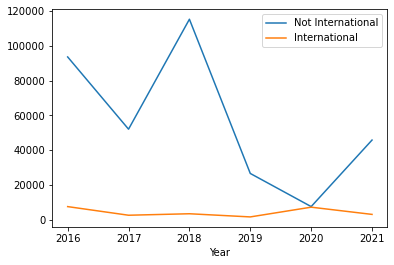

In [90]:
df = df.set_index("Year")
df.plot()

In [113]:
sat_gen_2021 = data_2021[["RUC1MJRRESOPP", "GENDER"]]
data_2020["GENDER"] = data_2020["GENDER"].replace({"Male":"M", "Female":"F"})
sat_gen_2020 = data_2020[["GENDER", "RUC1MJRRESOPP"]]
sat_gen_2019 = data_2019[["GENDER", "R29_RURESOPP"]]
sat_gen_2018 = data_2018[["GENDER", "R29_RURESOPP"]]
sat_gen_2017 = data_2017[["GENDER", "R29_RURESOPP"]]
#sat_gen_2016 = data_2016[["GENDER", "RUC1MJRRESOPP"]]

In [118]:
temp_2021 = sat_gen_2021.value_counts()
temp_2020 = sat_gen_2020.value_counts()
temp_2019 = sat_gen_2019.value_counts()
temp_2018 = sat_gen_2018.value_counts()
temp_2017 = sat_gen_2017.value_counts()

<AxesSubplot:xlabel='RUC1MJRRESOPP,GENDER'>

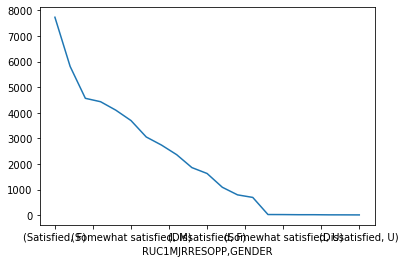

In [119]:
temp_2021.plot()

TypeError: 'value' must be an instance of str or bytes, not a tuple

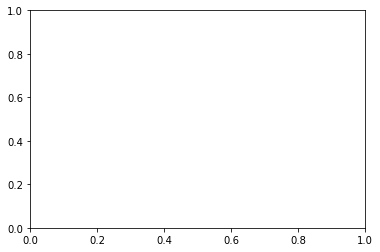

In [122]:
import matplotlib.pyplot as plt
years = ['2016', '2017', '2018', '2019', '2020', '2021']
plt.plot(temp_2021, color = "green")
#plt.plot(years, temp_2020, color = "blue")